<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Melanoma_with_CNN_with_Sigmoid_4_Pigmentation_rotate_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [1]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [3]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./Pigmentation/pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [4]:
pwd

'/content'

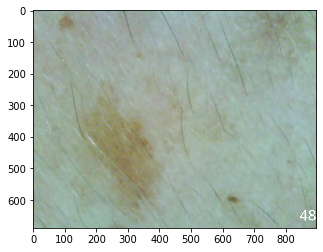

In [5]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [6]:
pigment_image.shape

(689, 898, 3)

In [0]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (192,256,3))


In [0]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

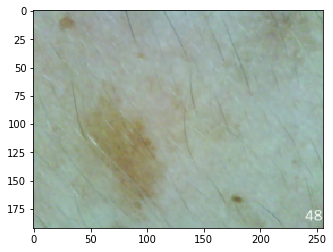

In [9]:
plt.imshow(pigment_image_resized)
plt.show()

In [10]:
type(pigment_image)

numpy.ndarray

In [0]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,192,256,3])

In [12]:
import scipy
scipy.__version__

'1.0.0'

In [13]:
!pip install pillow

In [0]:
if not (scipy.__version__ == '1.0.0'):
  !pip uninstall scipy==1.3.0
  !pip install scipy==1.0.0

In [15]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): 
    for filename in filenames:
        if re.search('d*.PNG', filename):
            filepath = os.path.join(root, filename)
            pig = ndimage.imread(filepath)
            pig_resized = skimage.transform.resize(pig, (192,256,3))  #redo this size or re-size later in Tensorflow
            pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
pigs = np.array(pigs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [16]:
filenames 

['6--09-28-am.PNG',
 '27--11-11-pm.PNG',
 '13--10-06-am.PNG',
 '8--09-29-am.PNG',
 '22--10-25-am.PNG',
 '17--10-13-am.PNG',
 '9--09-29-pm.PNG',
 '18--10-14-am.PNG',
 '2--09-23-pm.PNG',
 '14--10-10-am.PNG',
 '20--10-18-pm.PNG',
 '3--09-25-am.PNG',
 '26--11-10-am.PNG',
 '5--09-27-pm.PNG',
 '0-0--09-22-pm.PNG',
 '15--10-11-pm.PNG',
 '12--10-04-pm.PNG',
 '1-1--09-23-am.PNG',
 '19--10-16-pm.PNG',
 '25--11-06-pm.PNG',
 '21--10-120-pm.PNG',
 '16--10-12-pm.PNG',
 '4--09-25-pm.PNG',
 '11--10-02-pm.PNG',
 '10--09-30-pm.PNG',
 '7--09-28-pm.PNG',
 '23--10-28-pm.PNG',
 '24--11-04-am.PNG']

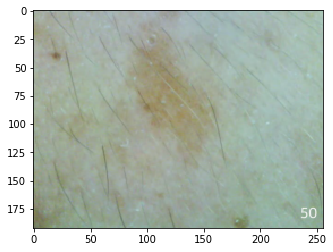

In [17]:
plt.imshow(pigs[0])


In [0]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [0]:

from skimage import data
from skimage.color import rgb2hsv, rgb2lab

In [0]:
from scipy import ndimage, misc
import re
import os
#there are 2594 photos
filenames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Training_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
           
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [0]:
#"/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"

from scipy import ndimage, misc
import re
import os
#there are 2594 photos
labelnames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
           
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [22]:
images = []
segs = []
for key in sorted(labelnames_dict.keys()):
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  seg = ndimage.imread(labelnames_dict[key], mode="L")
  images += [image]
  segs += [seg]
  
images = np.array(images)
segs = np.array(segs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


In [23]:
segs.shape

(2594, 192, 256)

In [24]:
images.shape

(2594, 192, 256, 3)

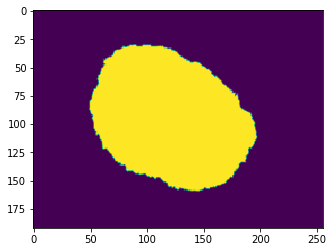

In [25]:
plt.imshow(segs[10])

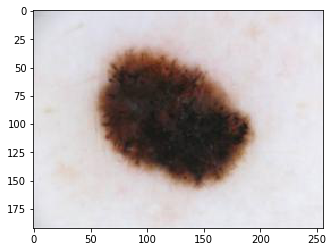

In [26]:
plt.imshow(images[10])

[[[0.17647059 0.15294118 0.2       ]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.23137255 0.22745098 0.28235294]
  [0.24313725 0.23529412 0.29019608]
  [0.25098039 0.24313725 0.29803922]]

 [[0.17254902 0.14901961 0.19607843]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.24313725 0.23921569 0.29411765]
  [0.2627451  0.25490196 0.30980392]
  [0.2745098  0.26666667 0.32156863]]

 [[0.16862745 0.14509804 0.19215686]
  [0.16862745 0.15686275 0.19215686]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.25098039 0.25098039 0.29803922]
  [0.27058824 0.2627451  0.31764706]
  [0.28235294 0.2745098  0.32941176]]

 ...

 [[0.34117647 0.31764706 0.3254902 ]
  [0.40784314 0.38431373 0.39215686]
  [0.49411765 0.47058824 0.47843137]
  ...
  [0.45882353 0.43529412 0.45098039]
  [0.41960784 0.39607843 0.41176471]
  [0.38431373 0.36078431 0.37647059]]

 [[0.29411765 0.27058824 0.27843137]
  [0.37254902 0.34901961 0.35686275]


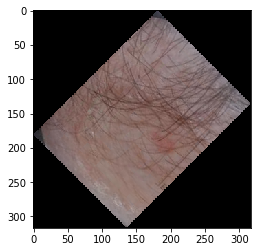

In [27]:
image = images[2580,:,:,:]/255
print(image)
rotate_image = ndimage.rotate(image, 45)
#rotate_image = misc.imresize(rotate_image, (192,256,6))
print(rotate_image)
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

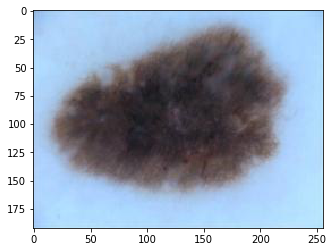

In [28]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

In [29]:
filepath

'./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4/24--11-04-am.PNG'

In [30]:
image.shape

(192, 256, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


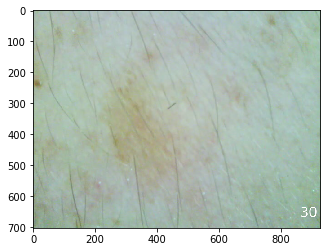

In [31]:
image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

**Check some features of the data to be sure that it uploaded properly**

check whether cells are aligned

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [33]:
trainim.shape

(2464, 192, 256, 3)

In [34]:
np.max(testlab)

255

In [35]:
testlab.shape

(130, 192, 256)

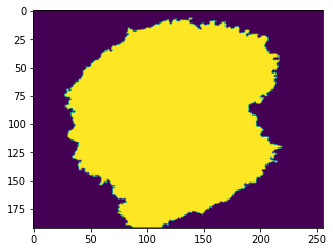

In [36]:
image = trainlab[0,:,:]
plt.imshow(image)
plt.show()

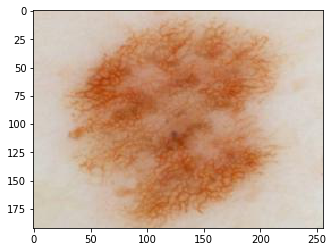

In [37]:
image = trainim[0,:,:,:]
plt.imshow(image)
plt.show()

In [0]:
def data_augmentations(features,lables,flag):
  if flag:
    #print("treat the first input image")
    #hsv_img = rgb2hsv(features[0])  #add 3 hsv channels       
    #plt.imshow(features[0])
    #plt.show()
    #plt.imshow(hsv_img)
    #plt.show()
    #print(hsv_img.dtype)
    #print(features[0].dtype)
    #print(hsv_img)
    #print(features[0])
    #l = rgb2lab(features[0])[:,:,0].reshape(192,256,1) #add the l channel from the lab space
    #image = np.concatenate((features[0]/255,hsv_img,l), axis =2)  #concatenate into one big image
    x2 = features[0].reshape([1,192,256,3]) #image.reshape([1,192,256,7])  #need to add "1" to first dimension for future concatenation
    image = features[0]
    #print("#flip the first image:")
    flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
    #plt.imshow(flip_ud_x2[0,:,:,:3])
   
    #plt.show()
    x2 = np.vstack((x2, flip_ud_x2)) 
    
    #print("#rotate the first image by a random angle")
    ra = np.random.random()*360
    rotate_x2 = ndimage.rotate(image, ra)
    #print(image)
    #print(rotate_x2)
    #plt.imshow(rotate_x2[:,:,:3])
    #plt.show()
    #print("test1")
    rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
    #plt.imshow(rotate_x2[0,:,:,:3])
    #print("test2")
    x2 = np.vstack((x2, rotate_x2 )) 
    
    #print("#treat the first label:")
    label = lables[0]
    #plt.imshow(label)
    #plt.show()
    y2 = label.reshape([1,192,256,1])
    #print("#flip the first label to match the first input image:")
    flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
    y2 = np.vstack((y2, flip_ud_y2)) 
    #plt.imshow(flip_ud_y2[0:,:,:,:])
    #plt.show()
    #print("#rotate the label by the same angle as the image")
    rotate_y2 = ndimage.rotate(label, ra)
    rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
    y2 = np.vstack((y2, rotate_y2)) 
    #plt.imshow(rotate_y2) 
    #plt.show()
  
    i = 1
    
    #print('#treat the subsequent images and labels')
    for image in features[1:]:
      #print(i)
      #plt.imshow(image)
      #plt.show()
      #hsv_img = rgb2hsv(image)  #add 3 hsv channels       
      #plt.imshow(hsv_img)
      #plt.show()
      #l = rgb2lab(image)[:,:,0].reshape(192,256,1) #add the l channel from the lab space
      #image = np.concatenate((image,hsv_img,l), axis =2)  #concatenate into one big image
      image2 = image.reshape([1,192,256,3])  #need to add "1" to first dimension for future concatenation
      
      x2 = np.vstack((x2, image2))
      #print('#flip the image:')
      flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
      x2 = np.vstack((x2, flip_ud_x2))
      #plt.imshow(flip_ud_x2[1,:,:,:3])
      #plt.show()
     
      #print('#rotate the image by a random angle')
      ra = np.random.random()*360
      rotate_x2 = ndimage.rotate(image, ra)
      rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
      x2 = np.vstack((x2, rotate_x2))
      #plt.imshow(rotate_x2[0,:,:,:3])
      #plt.show()
      
     
      #print('#treat the corresponding label:')
      label = lables[i]
      label2 = lables[i].reshape([1,192,256,1])
      #plt.imshow(label)
      #plt.show()
     
      y2 = np.vstack((y2,label2))
      #print('#flip the corresponding label to match the input image:')
      flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
      y2 = np.vstack((y2,flip_ud_y2))
      #plt.imshow(flip_ud_y2[0,:,:,:])
      #plt.show()
      
      
      #print('#rotate the label by the same angle as the image')
      rotate_y2 = ndimage.rotate(label, ra)
      rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
      y2 = np.vstack((y2,rotate_y2))
      #plt.imshow(rotate_y2) 
      #plt.show()
      
      #print('#scale images to 0-1 interval')
    x2 = x2/255
    y2 = y2/255
  else:
     x2 = features/255
     y2 = lables/255
  return x2, y2
    
  

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
       
        self.training_images = trainim   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
       
        self.training_labels = np.around(trainlab) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        
        
        
      
        self.test_images, labls = data_augmentations(testim, testlab,0)
        self.test_labels = labls.reshape((labls.shape[0],192,256))
       
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size], self.training_labels[0:xtra]))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size]
        #print(x.shape)
        x,y = data_augmentations(x,y,0)
        y = y.reshape((y.shape[0],192,256))
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

In [0]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

In [49]:
images.shape

(2594, 192, 256, 3)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,192,256,images.shape[3]])  #trace the shaping of these through the code...


In [0]:

y_true = tf.placeholder(tf.float32,shape=[None,192,256])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,192,256,images.shape[3]])  #-1 infers the shape of the first dimension (here, the batch size)

In [53]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,images.shape[3],16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.


In [54]:
print(convo_1_pooling.shape)

(?, 96, 128, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [56]:
print(convo_2_pooling.shape)

(?, 48, 64, 64)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [58]:
print(convo_3_pooling.shape)

(?, 24, 32, 128)


In [59]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
print(convo_4_pooling.shape)

(?, 12, 16, 256)


In [0]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [62]:
print(convo_5.shape)

(?, 12, 16, 512)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

###Need to look at the shapes and sizes of all of these layers###

In [65]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
(?, 24, 32, 256)


In [66]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

(?, 48, 64, 128)


In [67]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

(?, 96, 128, 128)


In [68]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

(?, 192, 256, 32)


In [69]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

(?, 192, 256, 16)


In [70]:
deconv_5.shape

TensorShape([Dimension(None), Dimension(192), Dimension(256), Dimension(16)])

In [0]:
y_pred = output

### Loss Function

In [0]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
union = sum_pred + sum_true - intersect  
jacc = intersect/union
            


#cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
#cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
cost =  tf.reduce_mean(tf.nn.relu(0.78 - jacc))
train = optimizer.minimize(cost)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

Session

In [76]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [77]:
tf.math.exp(1.)

<tf.Tensor 'Exp:0' shape=() dtype=float32>

starting init
done init
Currently on step 0
the time is  4.043696999999998 

Avg Jacc is:


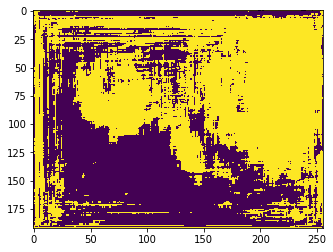

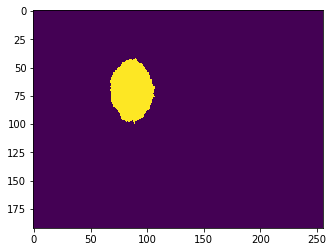

0.23027662130502555  step number is  0  batch_size is  16
Currently on step 100
the time is  27.252653000000002 

Avg Jacc is:


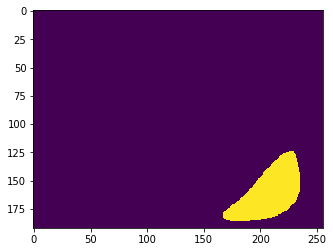

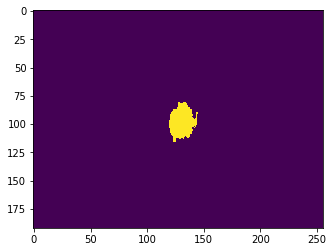

0.5930344801682692  step number is  100  batch_size is  16
Currently on step 200
the time is  46.988240999999995 

Avg Jacc is:


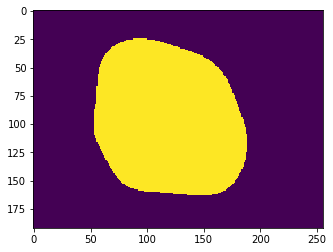

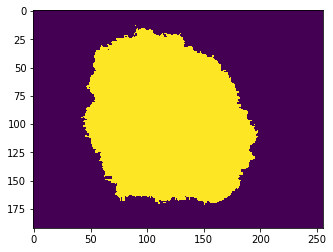

0.6173066946176382  step number is  200  batch_size is  16
Currently on step 300
the time is  66.846586 

Avg Jacc is:


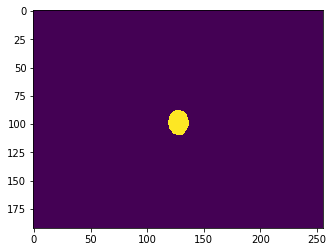

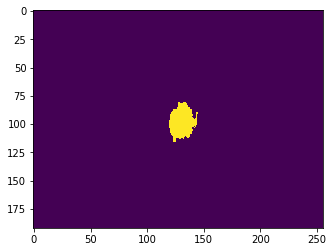

0.6398862985464243  step number is  300  batch_size is  16
Currently on step 400
the time is  86.58336299999999 

Avg Jacc is:


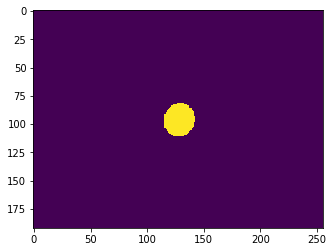

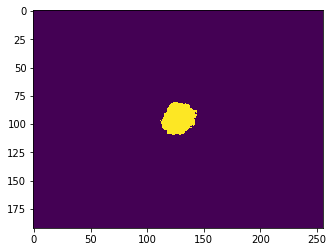

0.6730880737304688  step number is  400  batch_size is  16
Currently on step 500
the time is  106.489893 

Avg Jacc is:


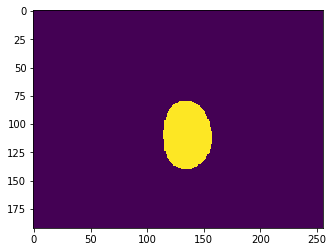

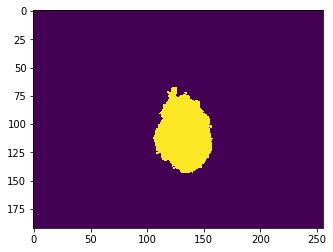

0.7279366126427284  step number is  500  batch_size is  16
Currently on step 600
the time is  126.467982 

Avg Jacc is:


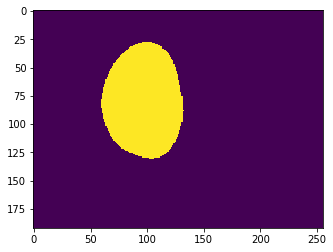

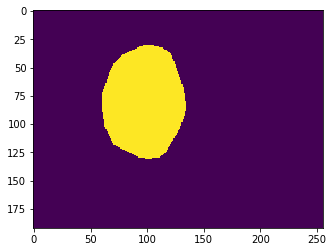

0.7139681302584134  step number is  600  batch_size is  16
Currently on step 700
the time is  146.538925 

Avg Jacc is:


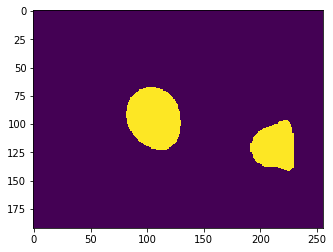

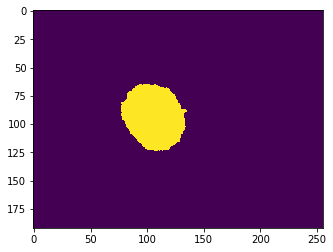

0.6844282883864182  step number is  700  batch_size is  16
Currently on step 800
the time is  166.609596 

Avg Jacc is:


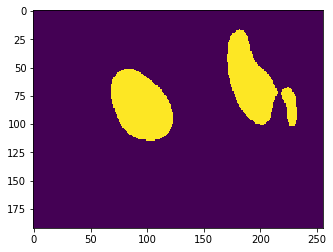

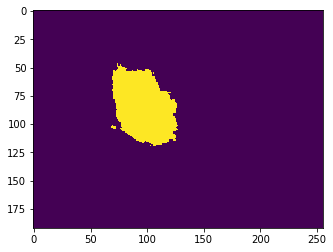

0.7078325711763822  step number is  800  batch_size is  16
Currently on step 900
the time is  186.882451 

Avg Jacc is:


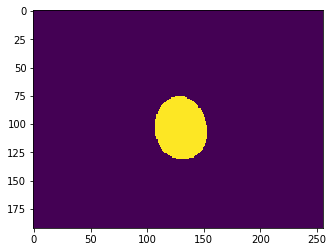

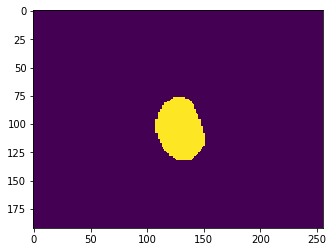

0.7099421574519231  step number is  900  batch_size is  16
Currently on step 1000
the time is  207.105055 

Avg Jacc is:


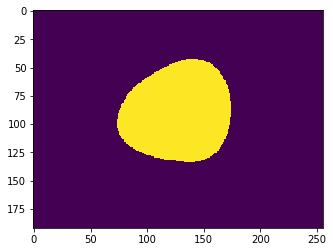

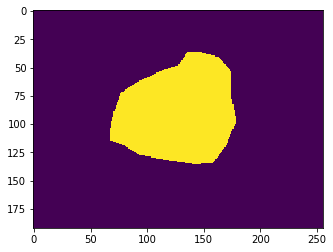

0.7150146484375  step number is  1000  batch_size is  16
Currently on step 1100
the time is  227.28514 

Avg Jacc is:


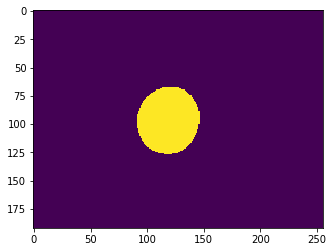

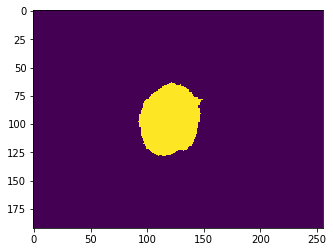

0.7393433790940505  step number is  1100  batch_size is  16
Currently on step 1200
the time is  247.57492399999998 

Avg Jacc is:


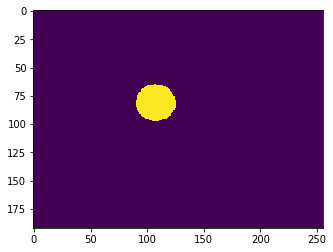

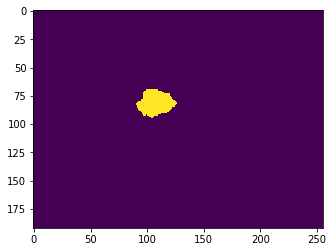

0.7373215895432692  step number is  1200  batch_size is  16
Currently on step 1300
the time is  267.770307 

Avg Jacc is:


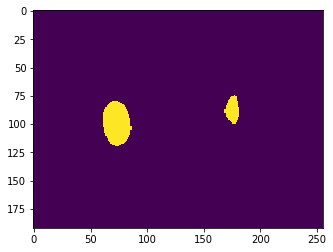

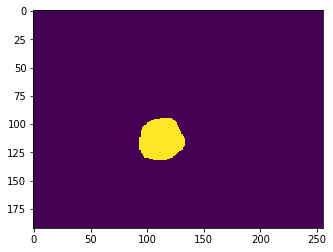

0.7196287888746995  step number is  1300  batch_size is  16
Currently on step 1400
the time is  288.058298 

Avg Jacc is:


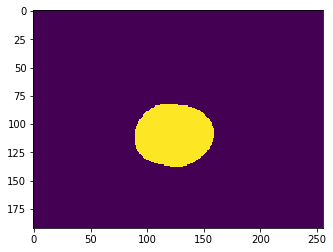

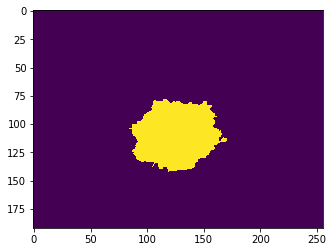

0.7375531710111178  step number is  1400  batch_size is  16
Currently on step 1500
the time is  308.297217 

Avg Jacc is:


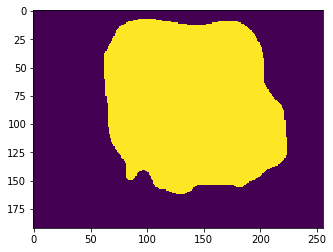

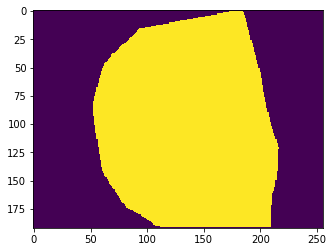

0.7393176739032452  step number is  1500  batch_size is  16
Currently on step 1600
the time is  328.462336 

Avg Jacc is:


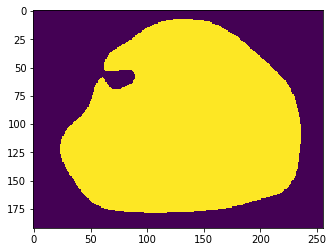

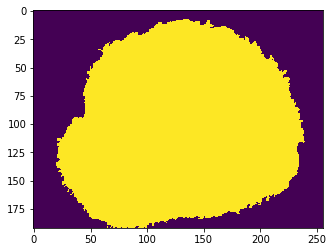

0.7290944026066707  step number is  1600  batch_size is  16
Currently on step 1700
the time is  348.654902 

Avg Jacc is:


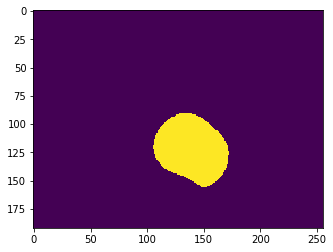

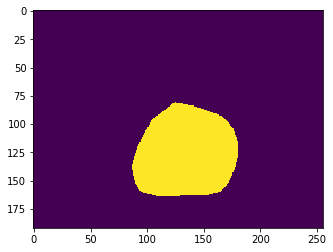

0.7262816209059495  step number is  1700  batch_size is  16
Currently on step 1800
the time is  368.884102 

Avg Jacc is:


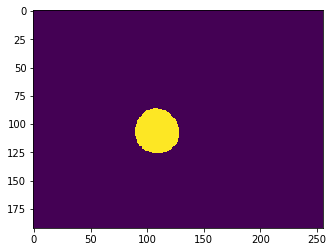

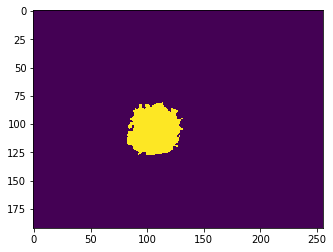

0.6868519709660457  step number is  1800  batch_size is  16
Currently on step 1900
the time is  389.16662299999996 

Avg Jacc is:


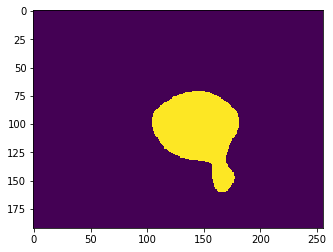

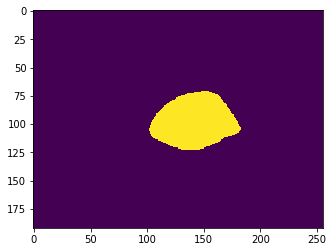

0.735627687894381  step number is  1900  batch_size is  16
Currently on step 2000
the time is  409.441989 

Avg Jacc is:


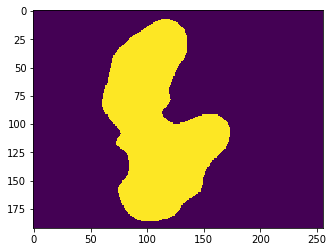

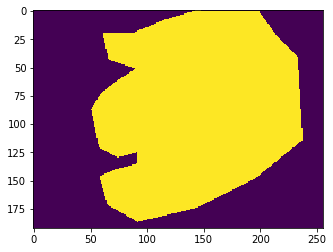

0.7331183213454027  step number is  2000  batch_size is  16
Currently on step 2100
the time is  429.665592 

Avg Jacc is:


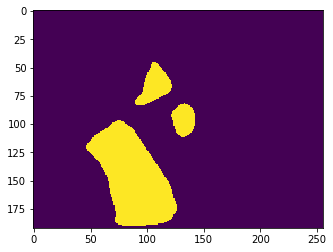

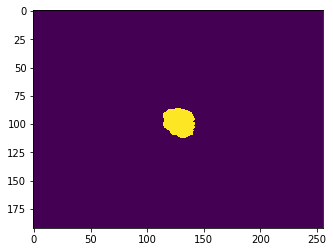

0.7181935237004207  step number is  2100  batch_size is  16
Currently on step 2200
the time is  449.850875 

Avg Jacc is:


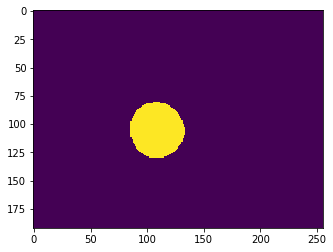

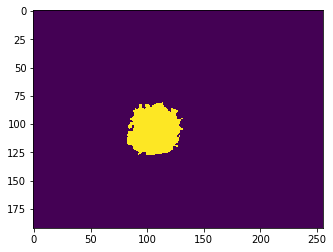

0.743844487116887  step number is  2200  batch_size is  16
Currently on step 2300
the time is  470.123362 

Avg Jacc is:


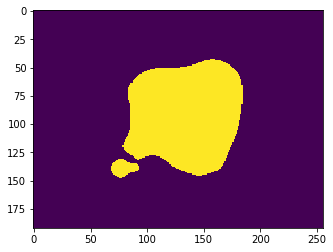

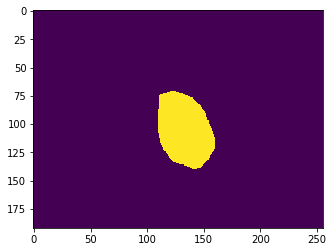

0.7267577538123497  step number is  2300  batch_size is  16
Currently on step 2400
the time is  490.425385 

Avg Jacc is:


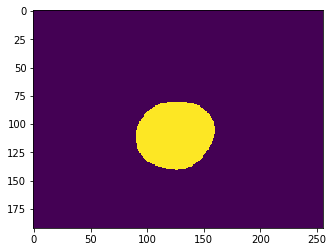

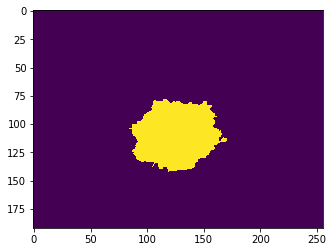

0.7131406343900241  step number is  2400  batch_size is  16
Currently on step 2500
the time is  510.70559099999997 

Avg Jacc is:


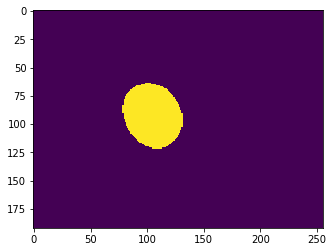

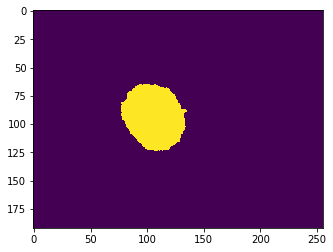

0.7435145451472356  step number is  2500  batch_size is  16
Currently on step 2600
the time is  530.8411920000001 

Avg Jacc is:


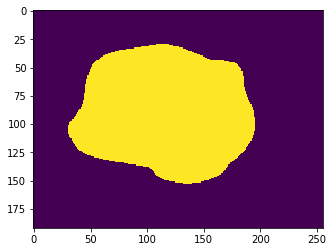

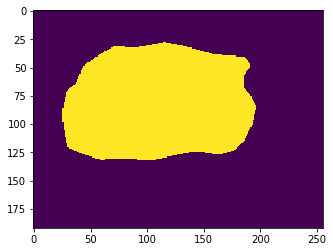

0.7403927142803486  step number is  2600  batch_size is  16
Currently on step 2700
the time is  550.9720930000001 

Avg Jacc is:


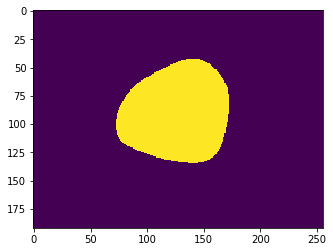

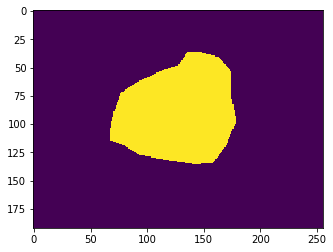

0.7538494403545674  step number is  2700  batch_size is  16
Currently on step 2800
the time is  571.12594 

Avg Jacc is:


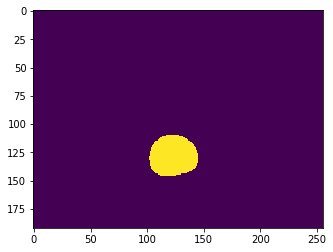

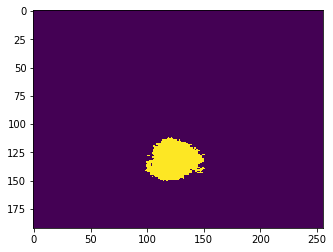

0.7429696890024039  step number is  2800  batch_size is  16
Currently on step 2900
the time is  591.155871 

Avg Jacc is:


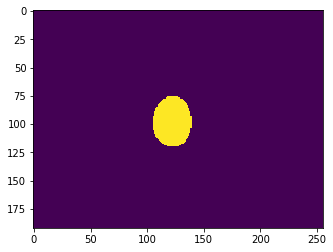

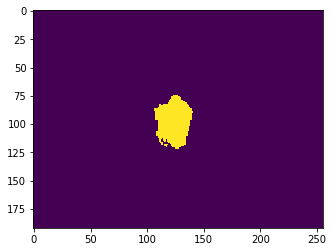

0.7547742990347055  step number is  2900  batch_size is  16
Currently on step 3000
the time is  611.2401040000001 

Avg Jacc is:


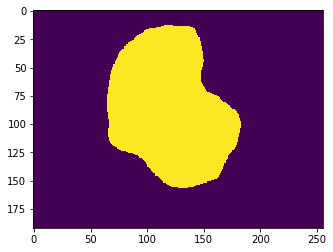

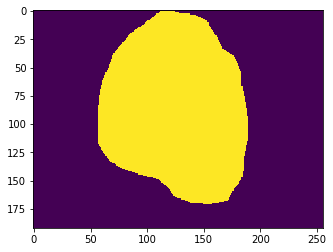

0.7540759746844952  step number is  3000  batch_size is  16
Currently on step 3100
the time is  631.2803180000001 

Avg Jacc is:


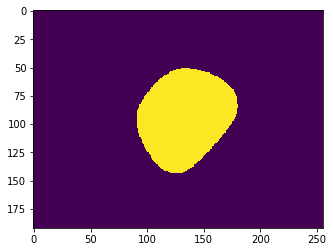

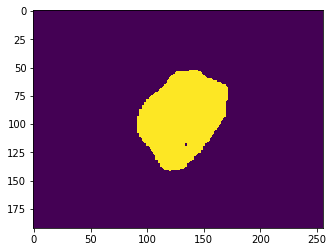

0.7410726693960337  step number is  3100  batch_size is  16
Currently on step 3200
the time is  651.3459700000001 

Avg Jacc is:


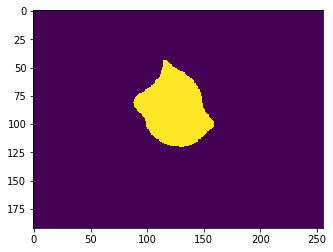

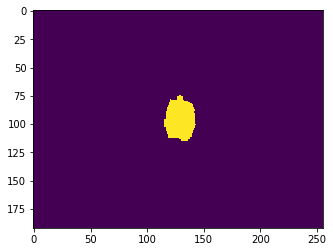

0.7369087219238282  step number is  3200  batch_size is  16
Currently on step 3300
the time is  671.401348 

Avg Jacc is:


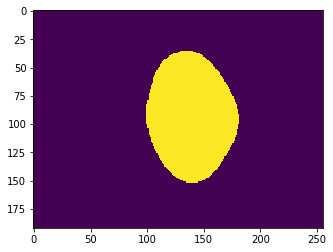

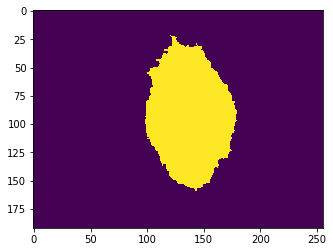

0.7455358651968149  step number is  3300  batch_size is  16
Currently on step 3400
the time is  691.396828 

Avg Jacc is:


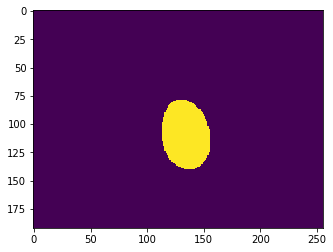

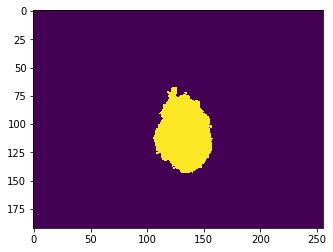

0.7442750197190505  step number is  3400  batch_size is  16
Currently on step 3500
the time is  711.334616 

Avg Jacc is:


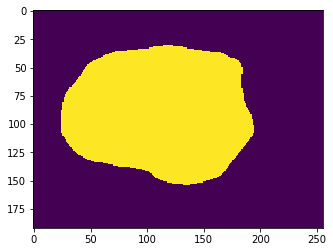

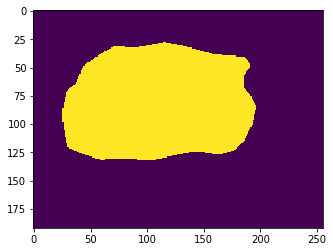

0.741009521484375  step number is  3500  batch_size is  16
Currently on step 3600
the time is  731.368203 

Avg Jacc is:


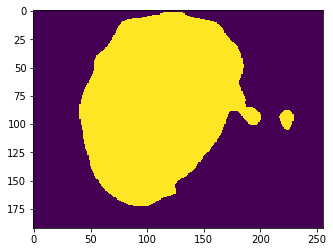

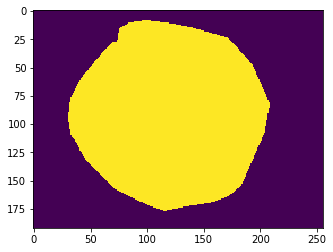

0.7560627863957332  step number is  3600  batch_size is  16
Currently on step 3700
the time is  751.480304 

Avg Jacc is:


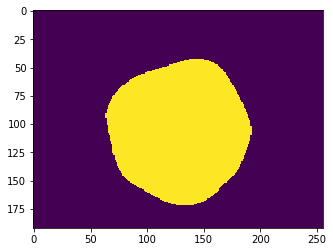

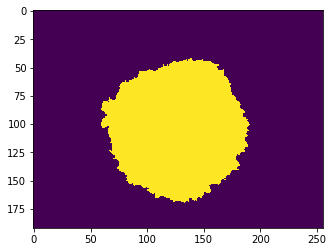

0.7657214824969952  step number is  3700  batch_size is  16
Currently on step 3800
the time is  771.595601 

Avg Jacc is:


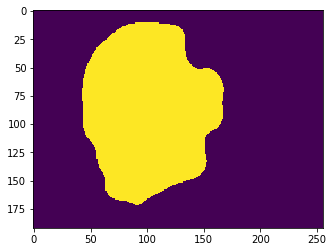

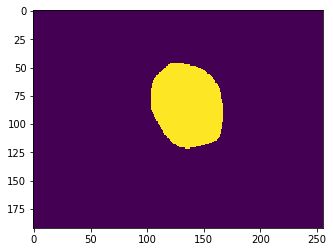

0.7279505803034856  step number is  3800  batch_size is  16
Currently on step 3900
the time is  791.6149760000001 

Avg Jacc is:


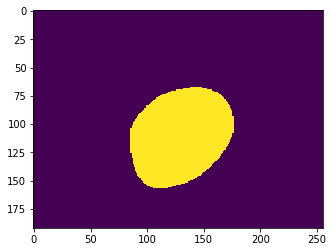

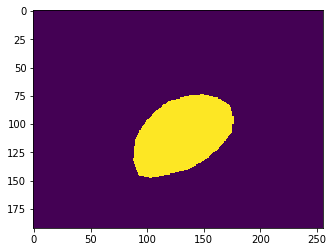

0.7523522010216346  step number is  3900  batch_size is  16
Currently on step 4000
the time is  811.9474620000001 

Avg Jacc is:


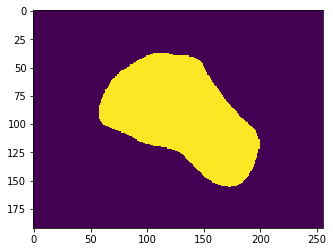

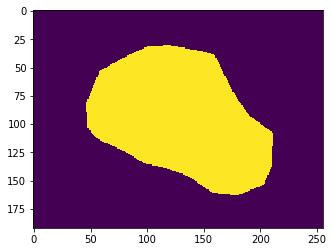

0.7227805504432091  step number is  4000  batch_size is  16
Currently on step 4100
the time is  832.049693 

Avg Jacc is:


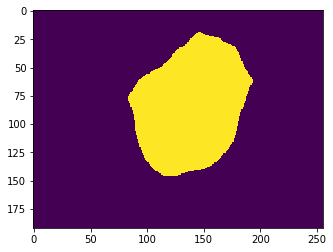

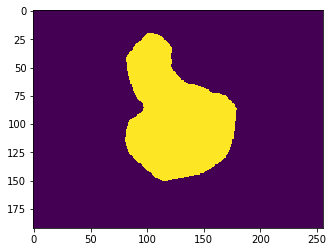

0.7442813579852764  step number is  4100  batch_size is  16
Currently on step 4200
the time is  852.0823 

Avg Jacc is:


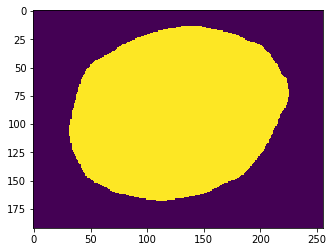

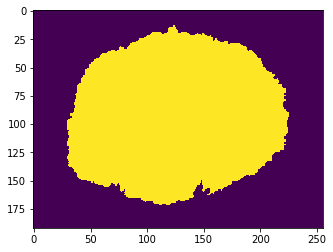

0.7452244685246394  step number is  4200  batch_size is  16
Currently on step 4300
the time is  872.315137 

Avg Jacc is:


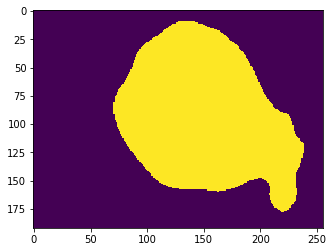

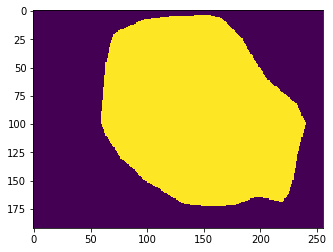

0.7574383075420673  step number is  4300  batch_size is  16
Currently on step 4400
the time is  892.650584 

Avg Jacc is:


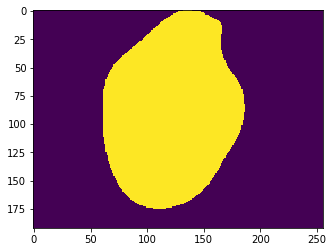

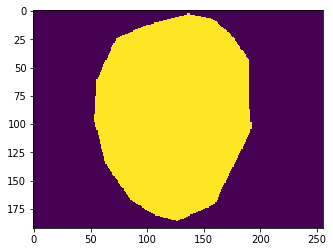

0.7657887385441706  step number is  4400  batch_size is  16
Currently on step 4500
the time is  912.728606 

Avg Jacc is:


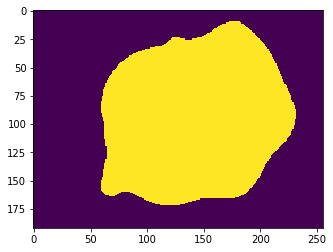

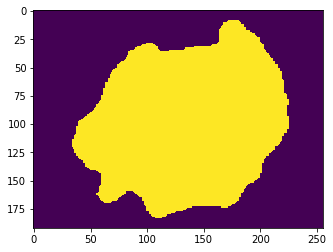

0.7395374004657452  step number is  4500  batch_size is  16
Currently on step 4600
the time is  932.764586 

Avg Jacc is:


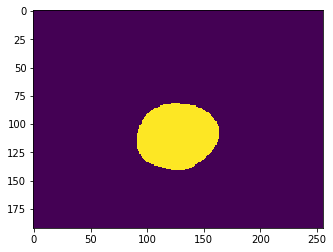

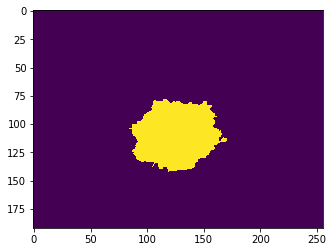

0.7568252563476563  step number is  4600  batch_size is  16
Currently on step 4700
the time is  952.698716 

Avg Jacc is:


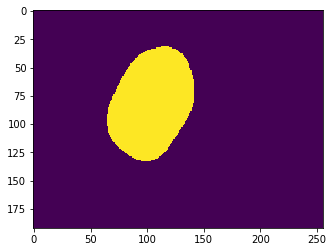

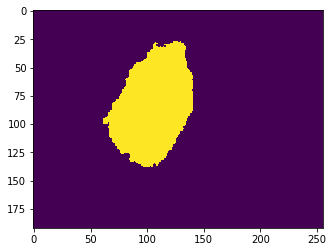

0.7691200256347657  step number is  4700  batch_size is  16
Currently on step 4800
the time is  972.7995490000001 

Avg Jacc is:


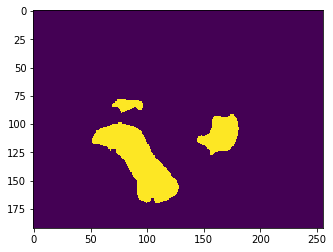

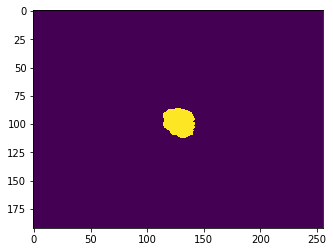

0.7564900324894832  step number is  4800  batch_size is  16
Currently on step 4900
the time is  992.854001 

Avg Jacc is:


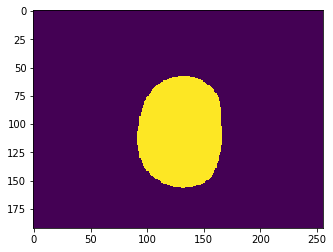

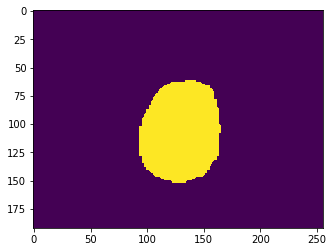

0.736718515249399  step number is  4900  batch_size is  16
Currently on step 5000
the time is  1012.87179 

Avg Jacc is:


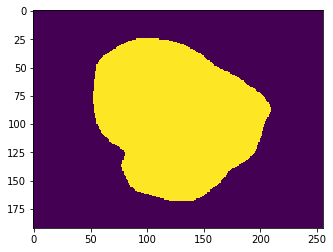

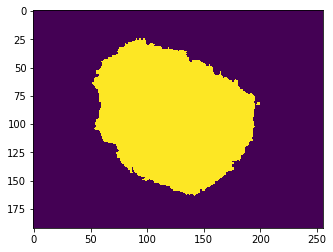

0.7483820988581731  step number is  5000  batch_size is  16
Currently on step 5100
the time is  1032.852453 

Avg Jacc is:


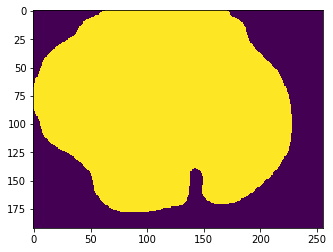

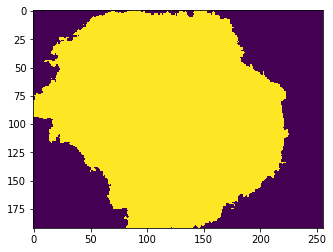

0.742684584397536  step number is  5100  batch_size is  16
Currently on step 5200
the time is  1052.8725809999999 

Avg Jacc is:


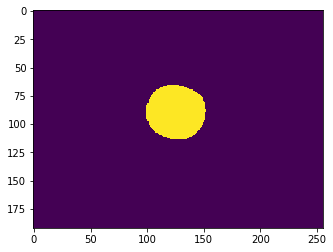

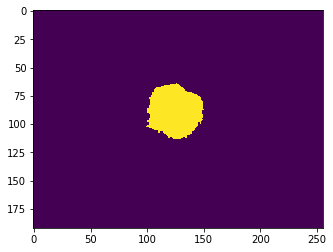

0.7534182621882513  step number is  5200  batch_size is  16
Currently on step 5300
the time is  1073.055788 

Avg Jacc is:


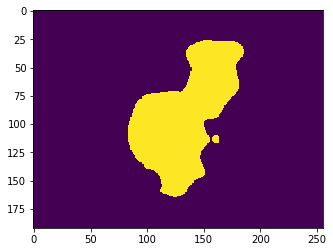

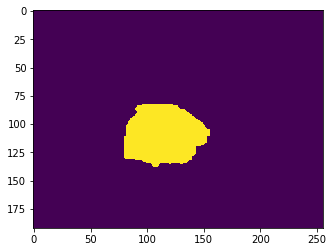

0.7565220759465144  step number is  5300  batch_size is  16
Currently on step 5400
the time is  1093.1161379999999 

Avg Jacc is:


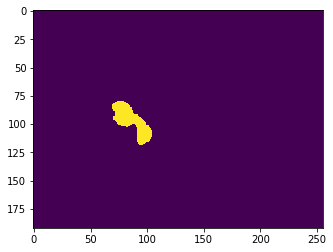

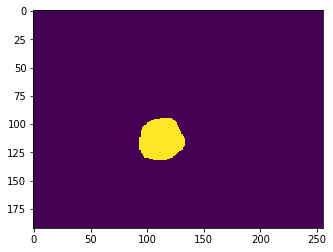

0.7614909245417668  step number is  5400  batch_size is  16
Currently on step 5500
the time is  1113.08763 

Avg Jacc is:


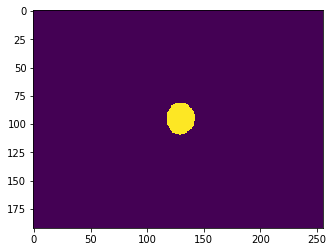

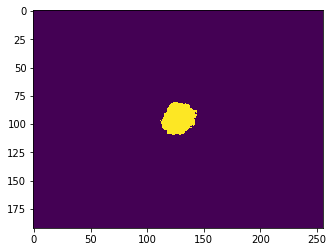

0.7405118502103365  step number is  5500  batch_size is  16
Currently on step 5600
the time is  1133.4005989999998 

Avg Jacc is:


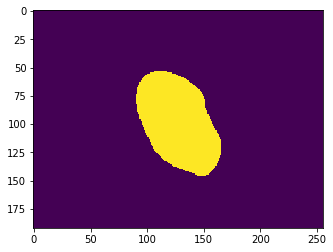

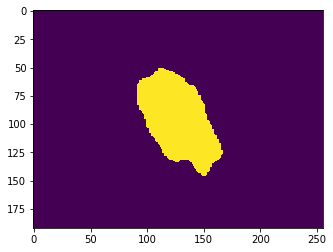

0.771664546086238  step number is  5600  batch_size is  16
Currently on step 5700
the time is  1153.518738 

Avg Jacc is:


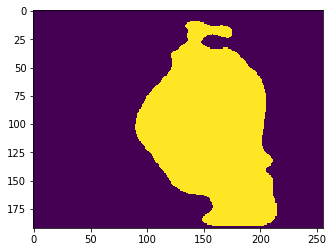

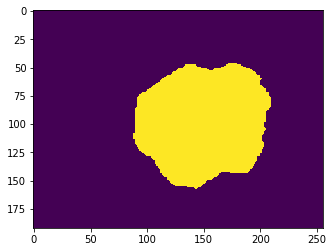

0.7588218102088341  step number is  5700  batch_size is  16
Currently on step 5800
the time is  1173.5393119999999 

Avg Jacc is:


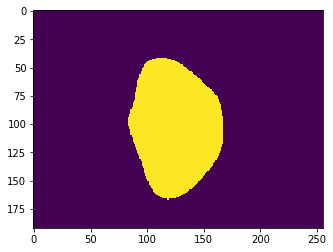

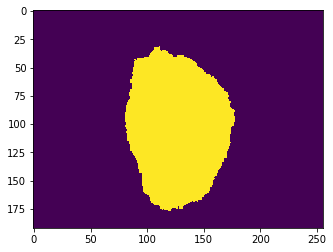

0.7183058518629808  step number is  5800  batch_size is  16
Currently on step 5900
the time is  1193.656469 

Avg Jacc is:


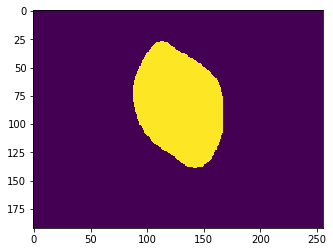

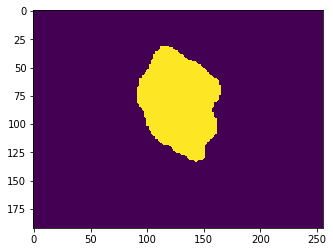

0.7534005972055289  step number is  5900  batch_size is  16
Currently on step 6000
the time is  1213.7335209999999 

Avg Jacc is:


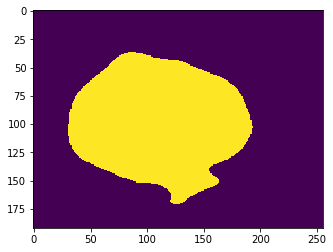

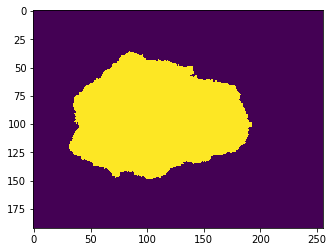

0.7522401076096755  step number is  6000  batch_size is  16
Currently on step 6100
the time is  1233.734655 

Avg Jacc is:


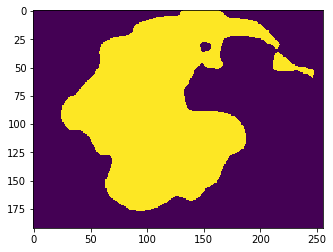

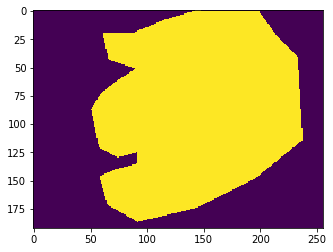

0.7387050922100361  step number is  6100  batch_size is  16
Currently on step 6200
the time is  1253.7428929999999 

Avg Jacc is:


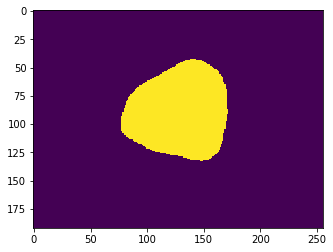

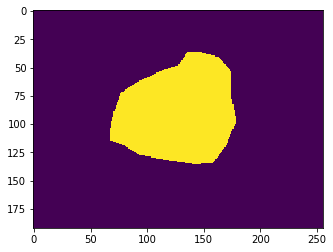

0.7447090735802284  step number is  6200  batch_size is  16
Currently on step 6300
the time is  1273.695949 

Avg Jacc is:


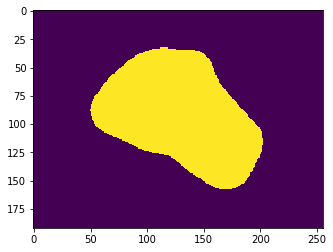

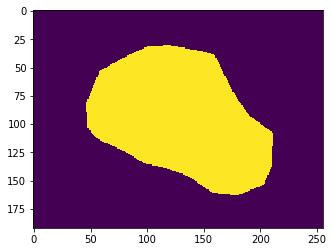

0.7430720402644231  step number is  6300  batch_size is  16
Currently on step 6400
the time is  1293.81105 

Avg Jacc is:


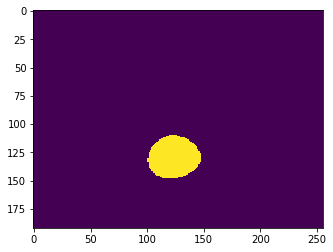

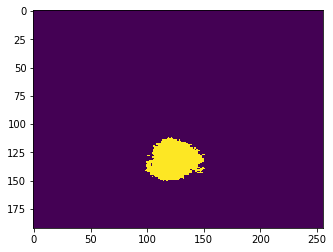

0.763144038273738  step number is  6400  batch_size is  16
Currently on step 6500
the time is  1313.8596909999999 

Avg Jacc is:


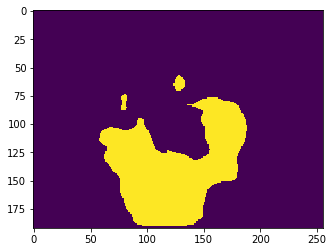

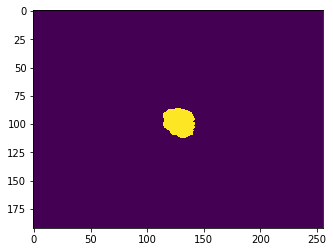

0.7521989088792067  step number is  6500  batch_size is  16
Currently on step 6600
the time is  1333.8793489999998 

Avg Jacc is:


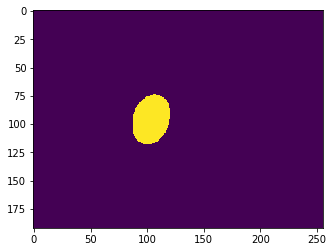

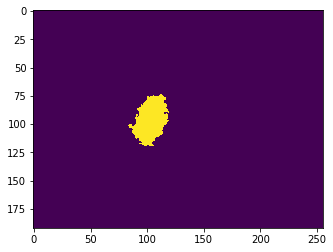

0.7569541344275841  step number is  6600  batch_size is  16
Currently on step 6700
the time is  1353.840228 

Avg Jacc is:


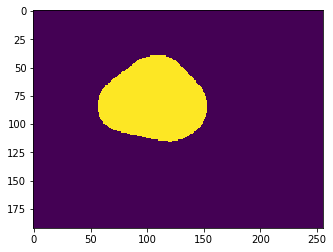

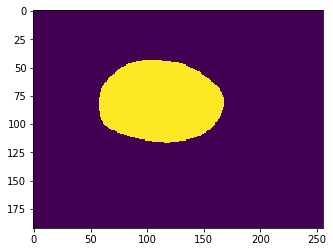

0.7616416344275841  step number is  6700  batch_size is  16
Currently on step 6800
the time is  1373.8960109999998 

Avg Jacc is:


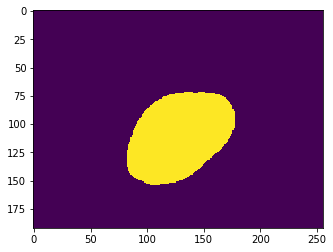

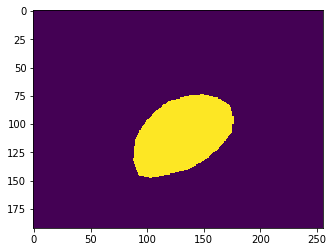

0.7506410452035758  step number is  6800  batch_size is  16
Currently on step 6900
the time is  1393.936512 

Avg Jacc is:


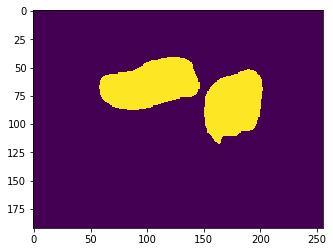

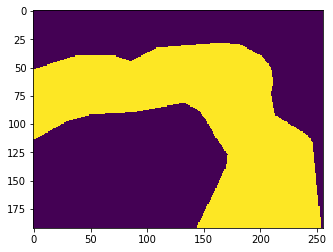

0.7574143629807693  step number is  6900  batch_size is  16
Currently on step 7000
the time is  1413.918682 

Avg Jacc is:


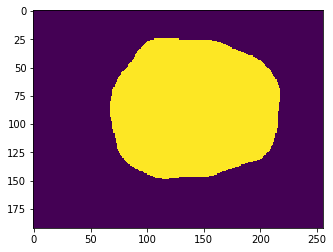

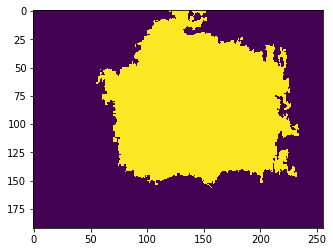

0.7564927321213942  step number is  7000  batch_size is  16
Currently on step 7100
the time is  1433.637964 

Avg Jacc is:


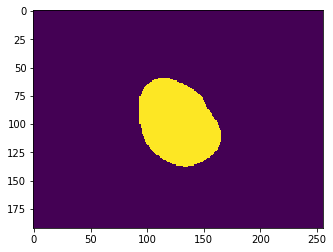

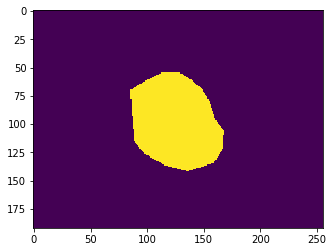

0.7558990478515625  step number is  7100  batch_size is  16
Currently on step 7200
the time is  1453.800331 

Avg Jacc is:


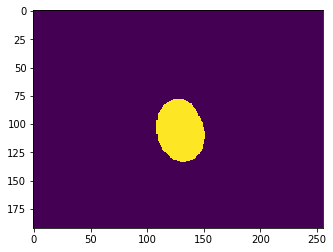

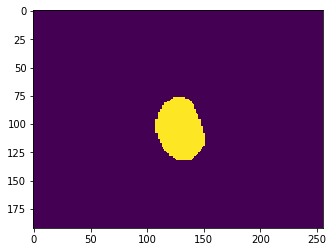

0.7432486900916466  step number is  7200  batch_size is  16
Currently on step 7300
the time is  1473.9951509999999 

Avg Jacc is:


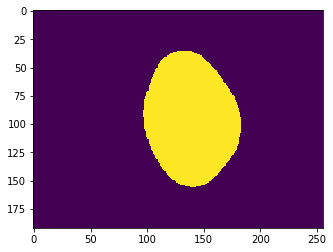

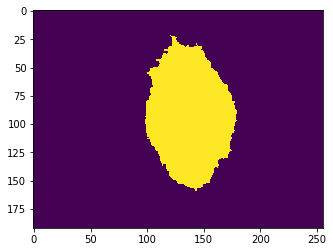

0.753071535550631  step number is  7300  batch_size is  16
Currently on step 7400
the time is  1494.147295 

Avg Jacc is:


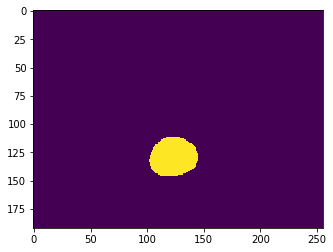

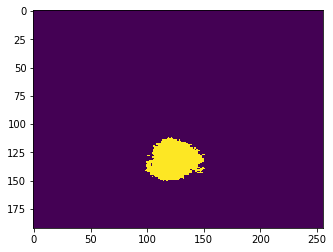

0.765341538649339  step number is  7400  batch_size is  16
Currently on step 7500
the time is  1514.2728539999998 

Avg Jacc is:


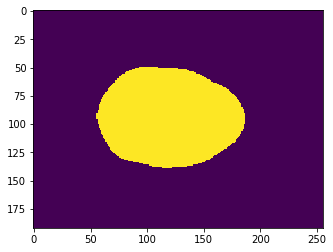

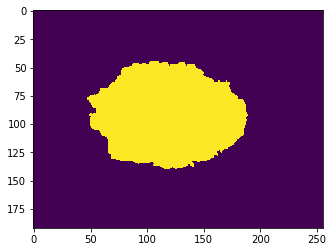

0.7555612417367789  step number is  7500  batch_size is  16
Currently on step 7600
the time is  1534.2188019999999 

Avg Jacc is:


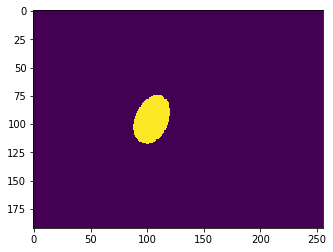

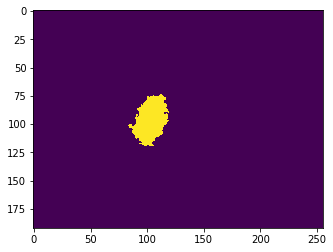

0.7694669870229868  step number is  7600  batch_size is  16
Currently on step 7700
the time is  1554.1450499999999 

Avg Jacc is:


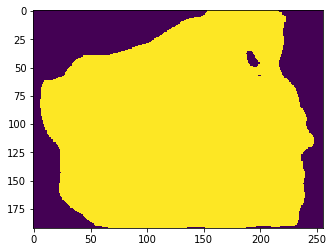

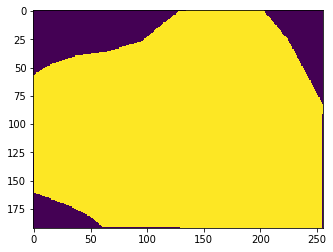

0.7804880582369291  step number is  7700  batch_size is  16
Currently on step 7800
the time is  1574.095793 

Avg Jacc is:


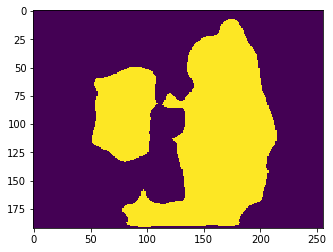

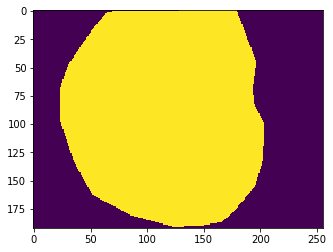

0.7533799978402945  step number is  7800  batch_size is  16
Currently on step 7900
the time is  1594.0894529999998 

Avg Jacc is:


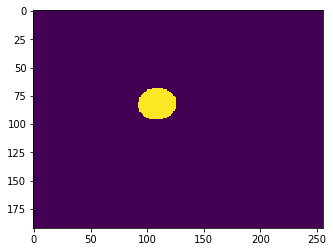

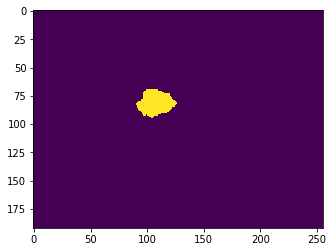

0.7319295443021334  step number is  7900  batch_size is  16
Currently on step 8000
the time is  1614.134722 

Avg Jacc is:


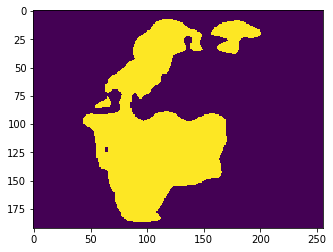

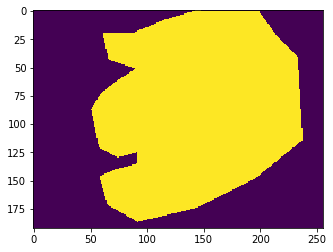

0.7648592435396635  step number is  8000  batch_size is  16
Currently on step 8100
the time is  1634.196919 

Avg Jacc is:


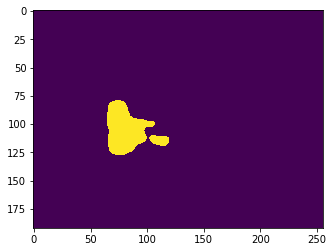

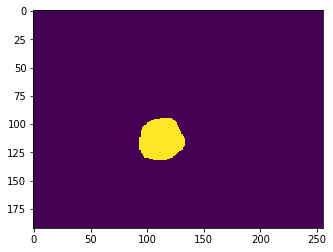

0.76178712111253  step number is  8100  batch_size is  16
Currently on step 8200
the time is  1654.242434 

Avg Jacc is:


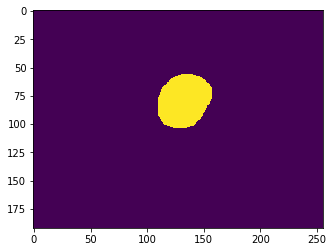

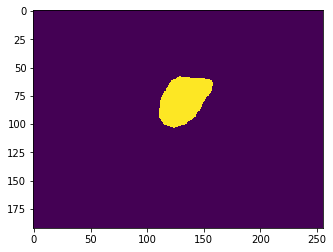

0.7554834219125601  step number is  8200  batch_size is  16
Currently on step 8300
the time is  1674.2915289999999 

Avg Jacc is:


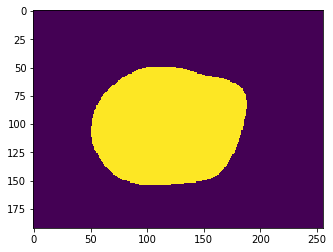

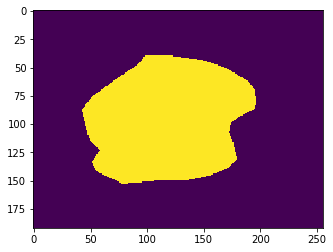

0.7539015549879807  step number is  8300  batch_size is  16
Currently on step 8400
the time is  1694.393218 

Avg Jacc is:


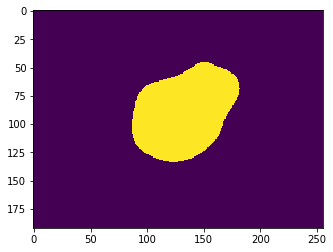

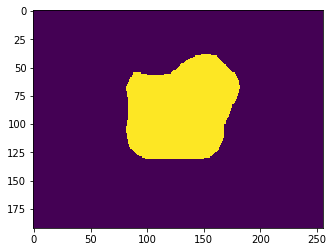

0.7686228825495793  step number is  8400  batch_size is  16
Currently on step 8500
the time is  1714.7009449999998 

Avg Jacc is:


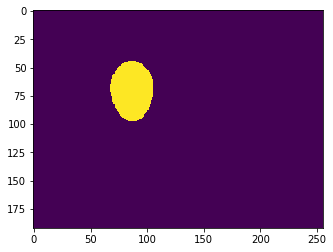

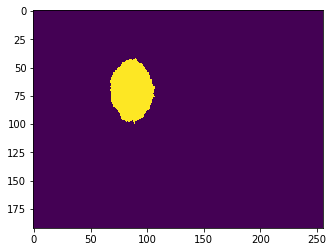

0.7533829909104567  step number is  8500  batch_size is  16
Currently on step 8600
the time is  1735.089241 

Avg Jacc is:


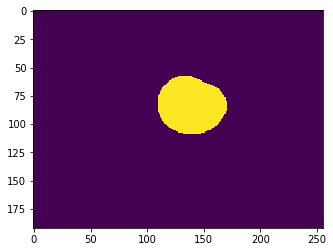

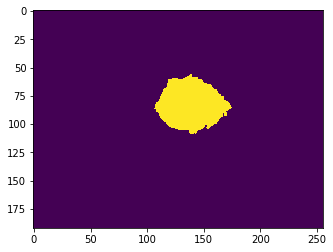

0.7628211388221153  step number is  8600  batch_size is  16
Currently on step 8700
the time is  1755.511002 

Avg Jacc is:


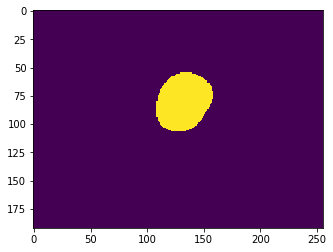

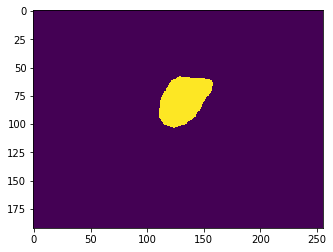

0.7668322049654447  step number is  8700  batch_size is  16
Currently on step 8800
the time is  1776.0866629999998 

Avg Jacc is:


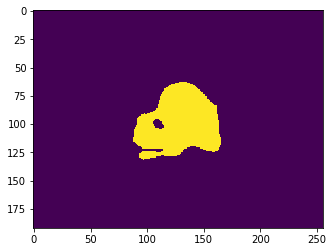

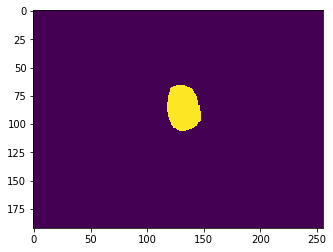

0.7372853792630709  step number is  8800  batch_size is  16
Currently on step 8900
the time is  1796.2964319999999 

Avg Jacc is:


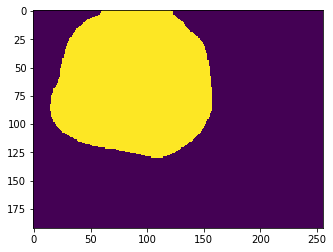

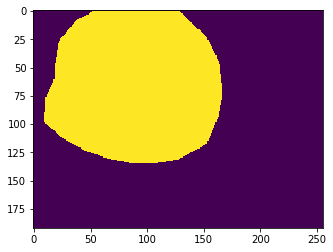

0.7542105454664964  step number is  8900  batch_size is  16
Currently on step 9000
the time is  1816.337241 

Avg Jacc is:


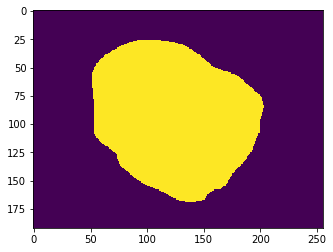

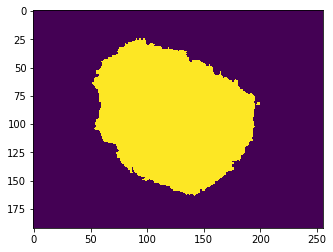

0.7680246206430289  step number is  9000  batch_size is  16
Currently on step 9100
the time is  1836.4365129999999 

Avg Jacc is:


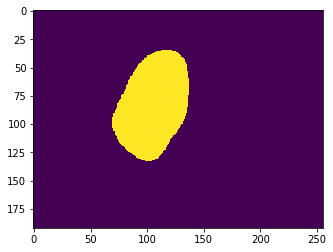

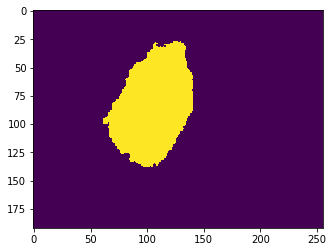

0.7361931434044471  step number is  9100  batch_size is  16
Currently on step 9200
the time is  1856.590538 

Avg Jacc is:


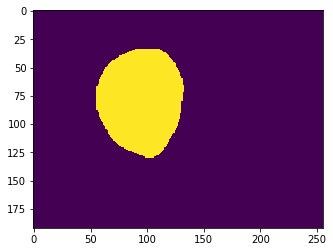

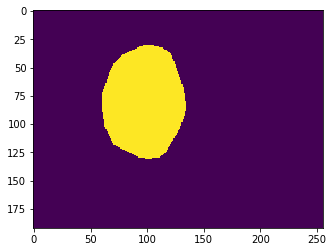

0.7573337261493389  step number is  9200  batch_size is  16
Currently on step 9300
the time is  1876.87526 

Avg Jacc is:


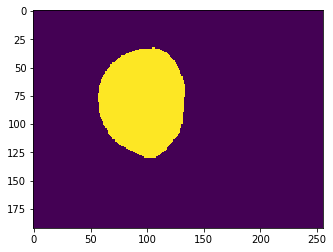

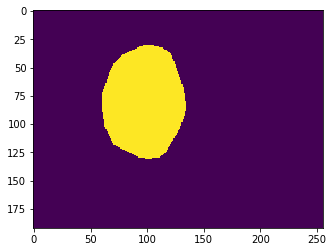

0.7634755061222956  step number is  9300  batch_size is  16
Currently on step 9400
the time is  1897.050149 

Avg Jacc is:


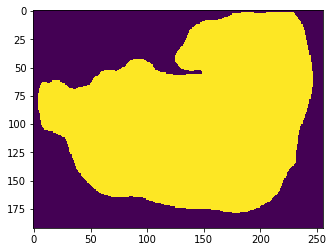

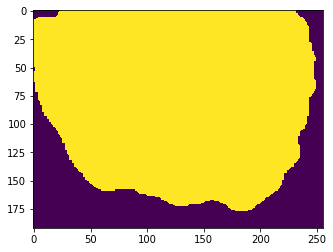

0.7542831420898437  step number is  9400  batch_size is  16
Currently on step 9500
the time is  1917.155702 

Avg Jacc is:


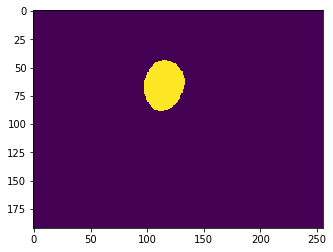

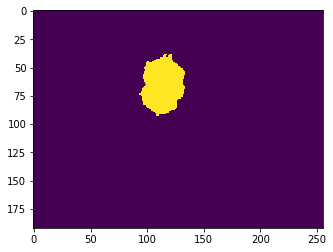

0.7506273709810697  step number is  9500  batch_size is  16
Currently on step 9600
the time is  1937.168173 

Avg Jacc is:


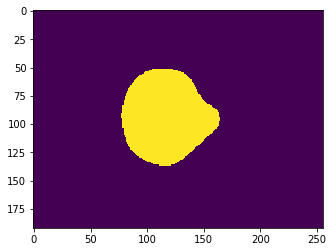

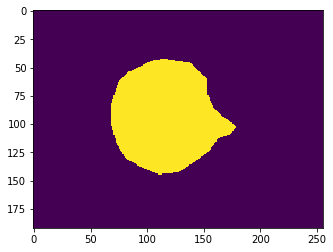

0.7419504018930289  step number is  9600  batch_size is  16
Currently on step 9700
the time is  1957.2022869999998 

Avg Jacc is:


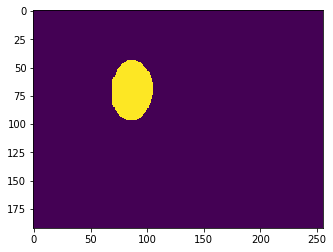

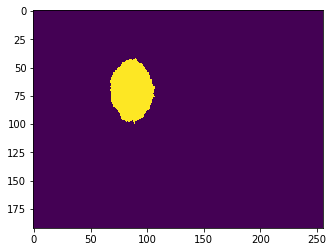

0.7542669442983774  step number is  9700  batch_size is  16
Currently on step 9800
the time is  1977.293864 

Avg Jacc is:


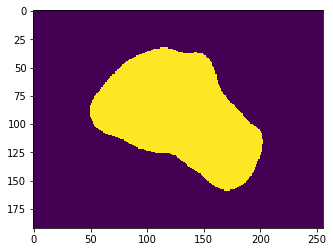

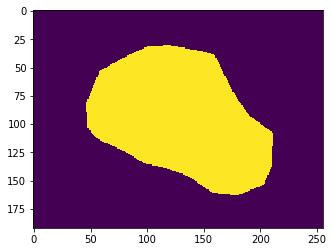

0.7401847252478966  step number is  9800  batch_size is  16
Currently on step 9900
the time is  1997.3076139999998 

Avg Jacc is:


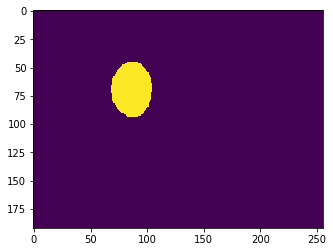

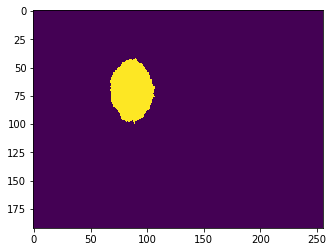

0.7202738835261419  step number is  9900  batch_size is  16
Currently on step 10000
the time is  2017.340586 

Avg Jacc is:


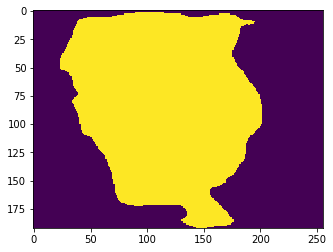

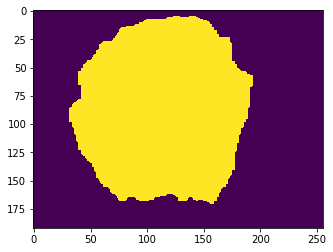

0.7567372248722957  step number is  10000  batch_size is  16
Currently on step 10100
the time is  2037.4288219999999 

Avg Jacc is:


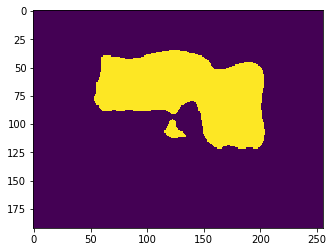

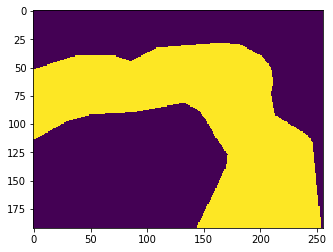

0.7626498882587139  step number is  10100  batch_size is  16
Currently on step 10200
the time is  2057.427526 

Avg Jacc is:


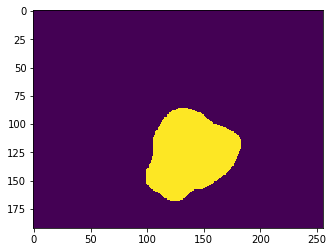

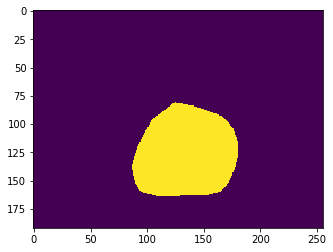

0.7539600078876202  step number is  10200  batch_size is  16
Currently on step 10300
the time is  2077.413721 

Avg Jacc is:


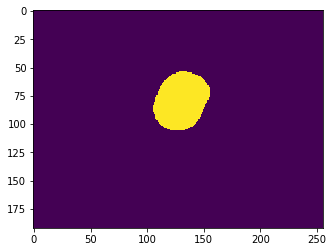

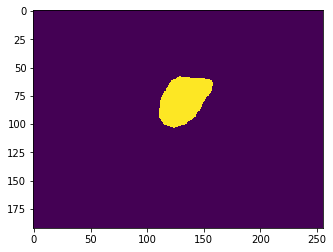

0.7604161189152644  step number is  10300  batch_size is  16
Currently on step 10400
the time is  2097.622413 

Avg Jacc is:


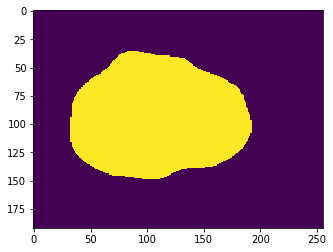

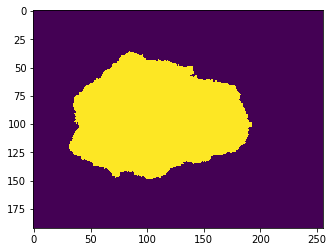

0.7644877507136418  step number is  10400  batch_size is  16


In [78]:
steps = 10500
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
            ####use with cross entropy####
            #pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            #true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)
            
        


            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect_o  #think this has an error
            jacc_o = intersect_o/union_o
            
            
            J_out_t = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out_t[0])/J_out_t[0].shape[0]
            j_train += [J_train]
            
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
           
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
            #print("intersection is", J_out[2], "union is", J_out[3], "\n", "y_pred is ", J_out[4], "true is ", J_out[5], "sum_pred =",  J_out[6], "sum_true", J_out[7])
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")
        
        

In [79]:
J_out[1].shape

(130, 192, 256)

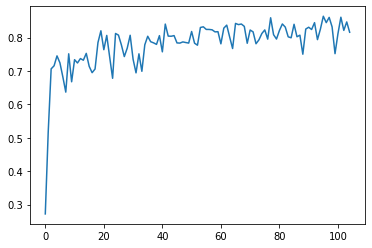

In [80]:
j_train = np.array(j_train)
j_test = np.array(j_test)
 plt.plot(j_train)

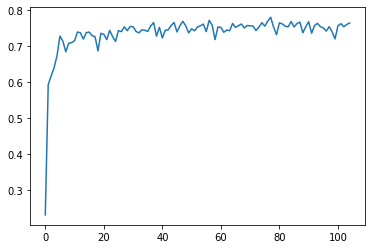

In [81]:

plt.plot(j_test)

(array([ 3.,  0.,  3.,  3.,  4.,  5.,  3., 22., 37., 50.]),
 array([0.        , 0.09512495, 0.19024989, 0.28537482, 0.38049978,
        0.4756247 , 0.57074964, 0.6658746 , 0.76099956, 0.85612446,
        0.9512494 ], dtype=float32),
 <a list of 10 Patch objects>)

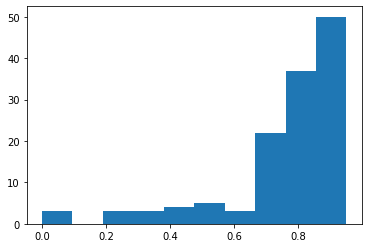

In [82]:
plt.hist(J_out[0])

(array([1., 1., 0., 2., 0., 1., 3., 4., 2., 2.]),
 array([0.63534915, 0.6642411 , 0.69313294, 0.72202486, 0.7509168 ,
        0.77980864, 0.80870056, 0.8375925 , 0.8664844 , 0.89537627,
        0.9242682 ], dtype=float32),
 <a list of 10 Patch objects>)

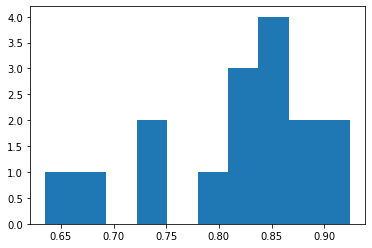

In [83]:
plt.hist(J_out_t[0])

In [84]:
#failure rate on test set:
fails = 0
for a in J_out[0]:
  if a < 0.65:
    fails += 1
    
rate = fails/J_out[0].shape[0]
rate

0.15384615384615385

## Great Job!

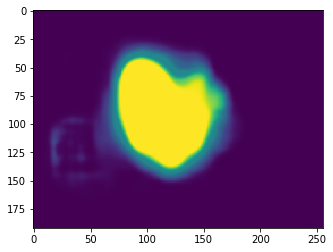

In [85]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [86]:
pigs.shape

(28, 192, 256, 3)

In [87]:
pred_pigment[0].shape

(28, 192, 256)

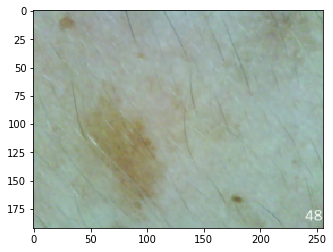

In [88]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
def visual_progress():

  mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
  for i in range(28):
    mask[:,:,0] = np.around(pred_pigment[0][i])
    mask[:,:,1] = np.around(pred_pigment[0][i])
    mask[:,:,2] = np.around(pred_pigment[0][i])


    image = pigs[i]
    notmask = 1- mask
    image2 = image*mask
    image1 = image*(1- mask)

    image2_avgr = np.average(image2[:,:,0], weights = mask[:,:,0])
    image2_avgg = np.average(image2[:,:,1], weights = mask[:,:,1]) 
    image2_avgb = np.average(image2[:,:,2], weights = mask[:,:,2])

    image1_avgr = np.average(image1[:,:,0], weights = notmask[:,:,0])
    image1_avgg = np.average(image1[:,:,1], weights = notmask[:,:,1]) 
    image1_avgb = np.average(image1[:,:,2], weights = notmask[:,:,2])

    image2_avg = np.zeros(image2.shape)
    image1_avg = np.zeros(image1.shape)
    image2_avg[:,:,0] = image2_avgr
    image2_avg[:,:,1] = image2_avgg
    image2_avg[:,:,2] = image2_avgb

    image1_avg[:,:,0] = image1_avgr
    image1_avg[:,:,1] = image1_avgg
    image1_avg[:,:,2] = image1_avgb
#mask = 1-mask
#mask = mask.astype(int)
    plt.imshow(image2_avg)
    plt.show()
  
#image[mask] = 0

    plt.imshow(image1_avg)
    plt.show()

    print("next day..\n")
  return()

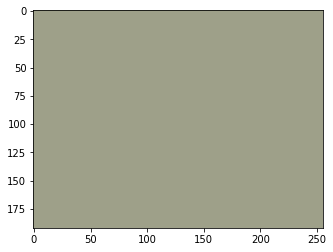

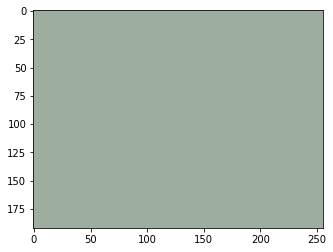

next day..



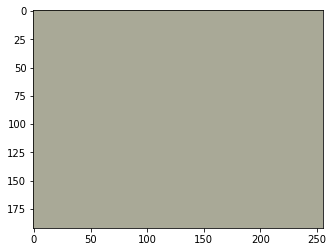

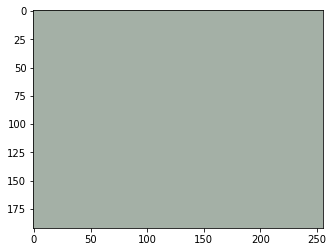

next day..



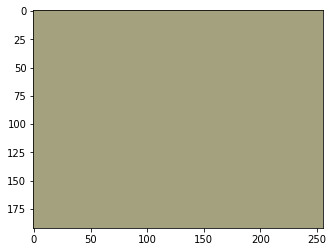

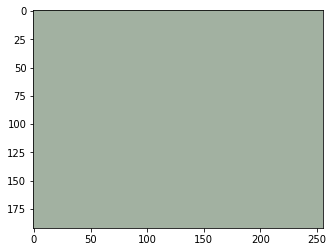

next day..



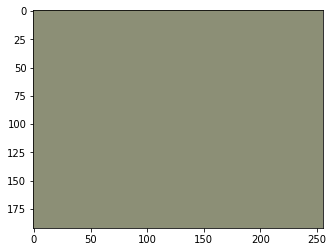

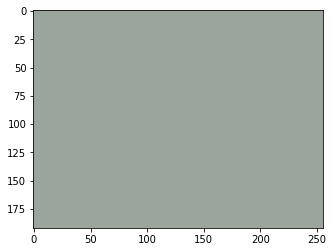

next day..



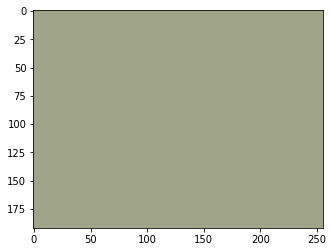

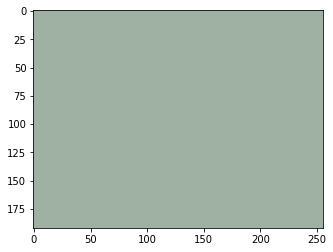

next day..



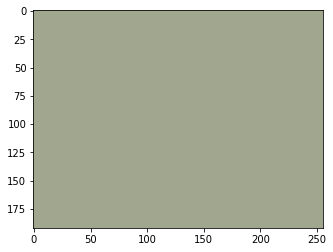

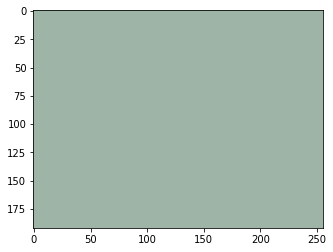

next day..



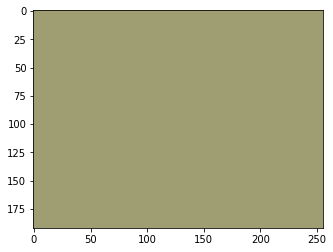

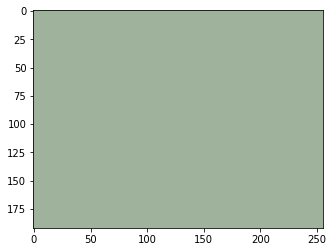

next day..



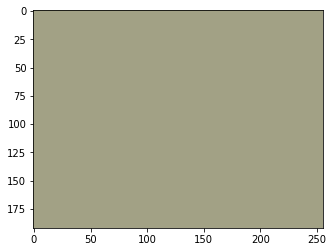

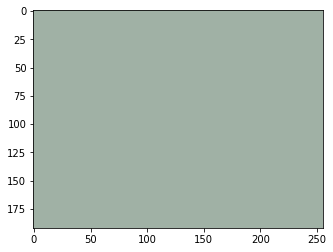

next day..



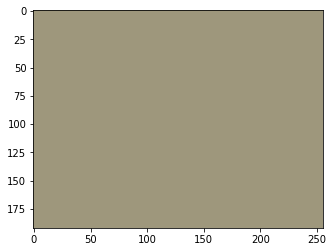

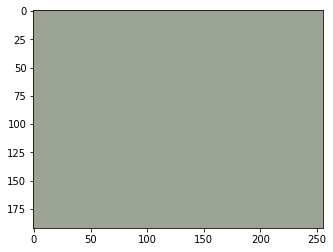

next day..



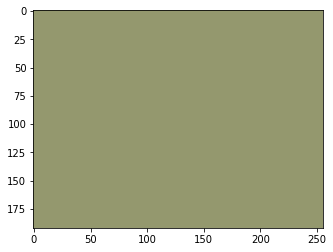

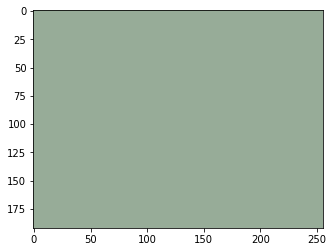

next day..



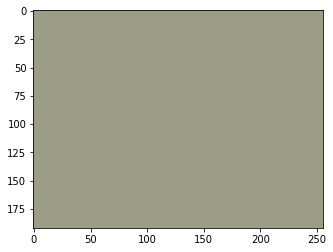

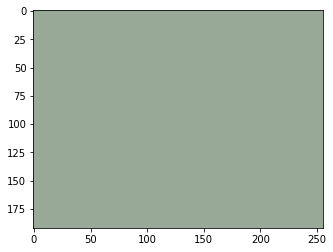

next day..



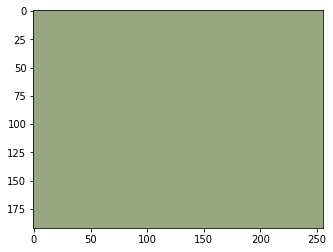

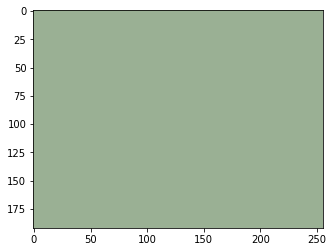

next day..



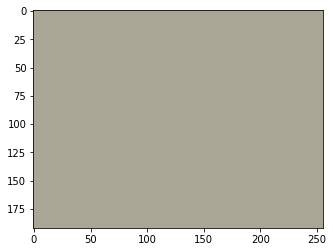

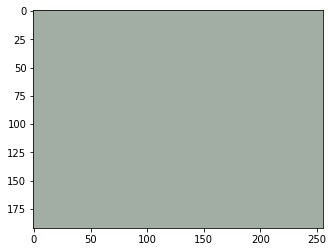

next day..



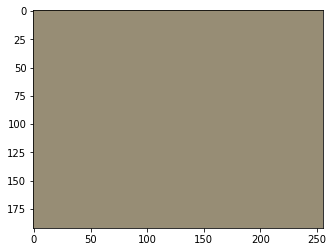

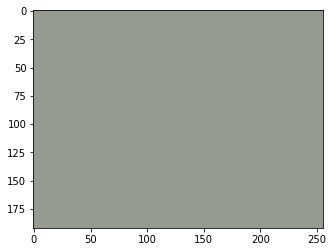

next day..



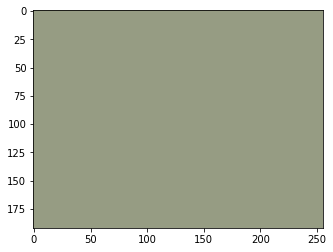

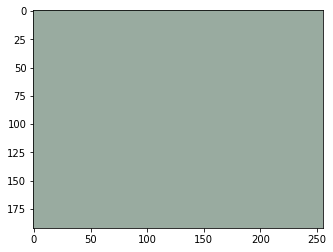

next day..



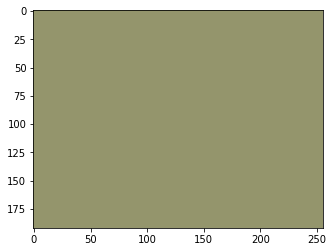

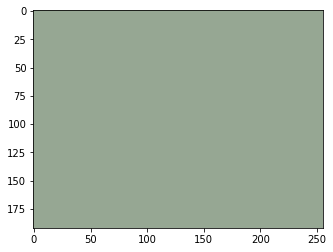

next day..



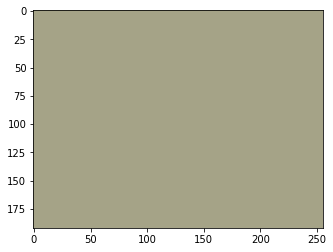

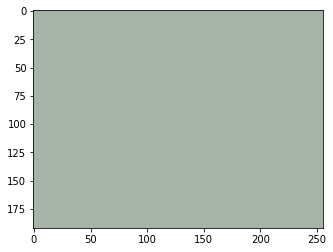

next day..



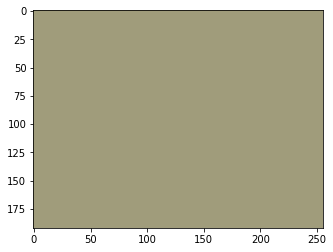

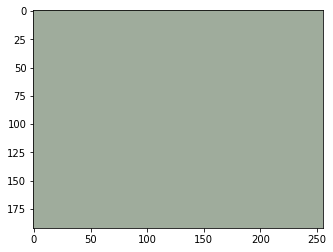

next day..



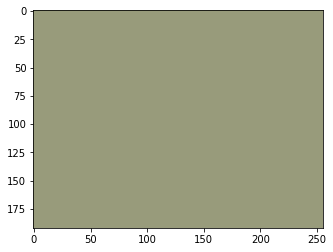

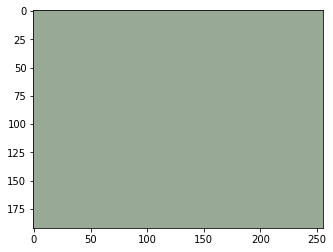

next day..



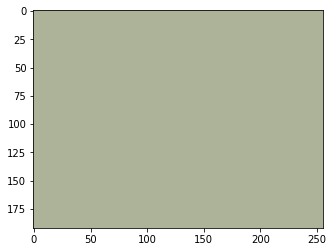

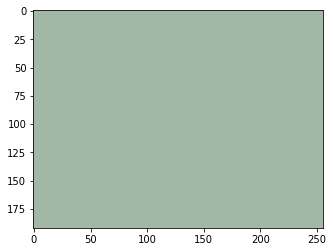

next day..



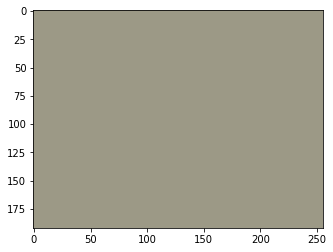

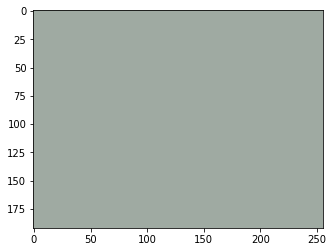

next day..



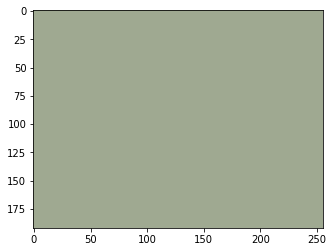

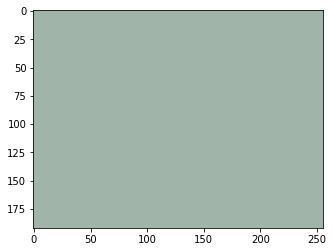

next day..



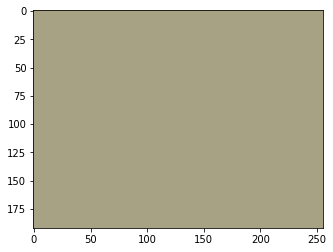

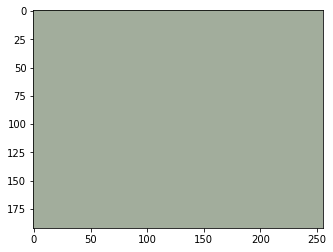

next day..



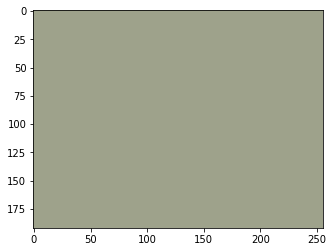

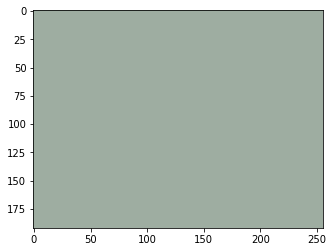

next day..



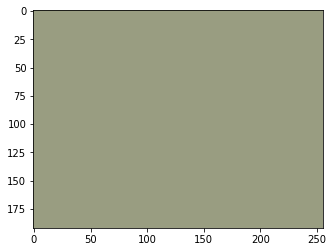

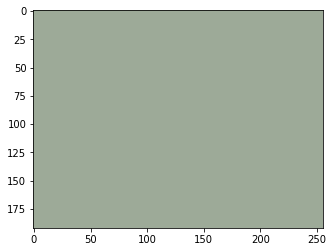

next day..



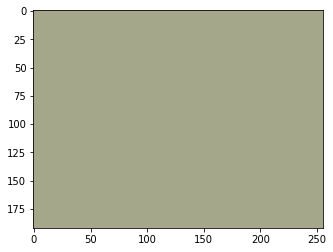

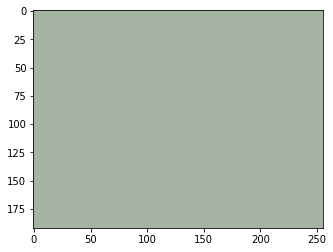

next day..



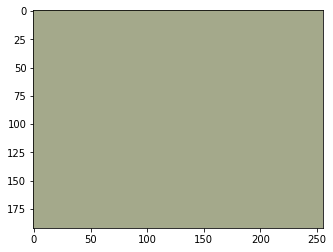

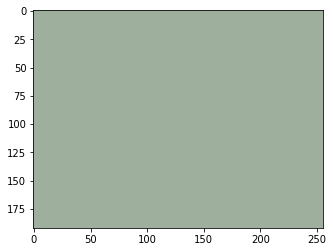

next day..



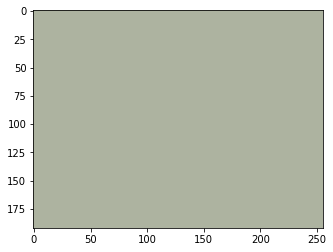

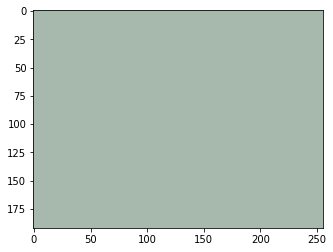

next day..



()

In [277]:
visual_progress()

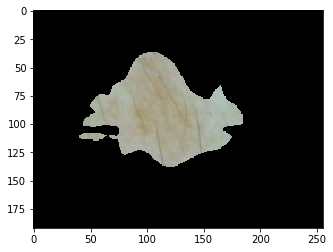

In [268]:
plt.imshow(image2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


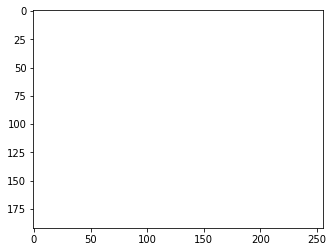

array([[[1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        ...,
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388]],

       [[1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        ...,
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388]],

       [[1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        ...,
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388]],

       ...,

       [[1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1.3332512 , 1.18601388],
        [1.32731676, 1

In [269]:

plt.imshow(image2_avg)
plt.show()
image2_avg

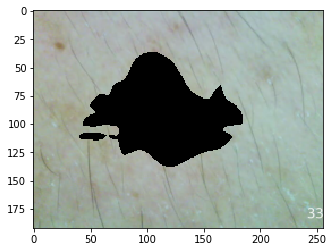

In [194]:
plt.imshow(image1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


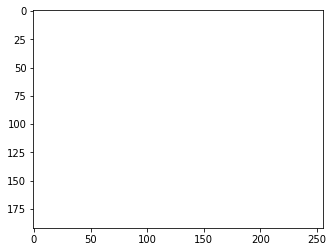

In [271]:
plt.imshow(image1_avg)
plt.show()

In [94]:
image2[:,:,0].shape

(192, 256)

In [0]:
red = image2[:,:,0].reshape(-1)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

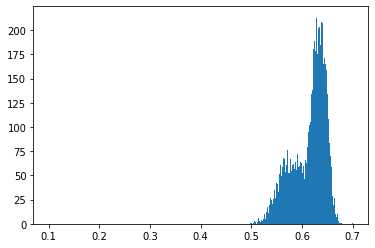

In [96]:
plt.hist(red, bins = 500, range = (0.1, red.max()))

In [0]:
plt.show()

In [0]:
a2 = np.average(red, weights = mask[:,:,0].reshape(-1))

In [99]:
a2

0.6135955712789211

In [100]:
mask[0].shape

(256, 3)

In [0]:
red_norm = image1[:,:,0].reshape(-1)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

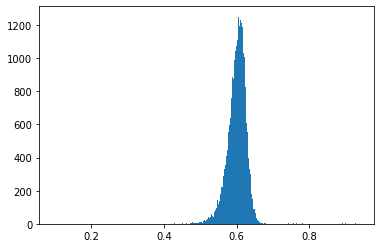

In [102]:
plt.hist(red_norm, bins = 500, range = (0.1, red_norm.max()))

In [0]:
plt.show()

In [0]:
mask_inv = 1-mask

In [0]:
a1 = np.average(red_norm, weights =mask_inv[:,:,0].reshape(-1))

In [106]:
mask_inv.shape

(192, 256, 3)

In [107]:
a1

0.600539876150315

In [108]:
a1 - a2

-0.013055695128606049

In [0]:
blue = image2[:,:,2].reshape(-1)

In [0]:
blue_norm = image1[:,:,2].reshape(-1)

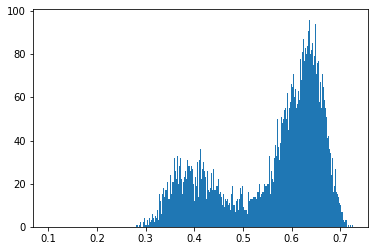

In [111]:
plt.hist(blue, bins = 500, range = (0.1, blue.max()))
plt.show()

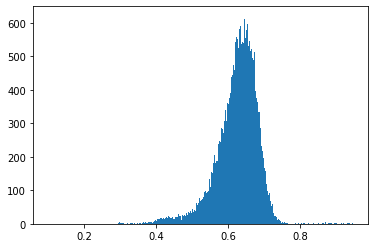

<Figure size 432x288 with 0 Axes>

In [200]:
plt.hist(blue_norm, bins = 500, range = (0.1, blue_norm.max()))
plt.figure()
plt.show()

In [0]:
def measure_progress(pigs,masks):  ##changed from blue to red
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,0].reshape(-1)
        blue_pig = imagep[:,:,0].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,0].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,0].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [203]:
J_out[1].shape

(130, 192, 256)

In [204]:
pigmented

array([125.70967108, 136.03706939, 126.02737169, 104.3584809 ,
       125.09738723, 133.23332651, 127.25976624, 127.0644264 ,
       130.0800065 , 115.00344154, 126.15943921, 114.24022798,
       132.89788339, 112.93348982, 113.23270623, 116.24805297,
       127.67722967, 126.28619251, 119.38492919, 137.94296131,
       133.39606712, 127.47232246, 134.76677869, 116.0030551 ,
       106.07832157, 126.00569138, 129.42359214, 131.51061861])

In [205]:
normal

array([148.85944356, 156.69419762, 154.37089853, 149.0592749 ,
       151.33268647, 153.2471213 , 154.33040281, 153.48427241,
       147.65016804, 147.01731925, 137.52425335, 145.81653611,
       153.73460772, 136.24679438, 141.64369731, 145.22921758,
       157.45169503, 151.61684088, 144.31418521, 156.98572247,
       148.00609457, 151.15212882, 155.14526814, 147.25166236,
       146.85364173, 157.21244972, 151.38981268, 153.72511363])

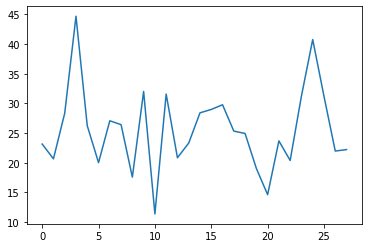

In [206]:
plt.plot(normal - pigmented)

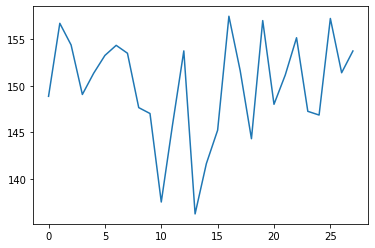

In [207]:
plt.plot(normal)

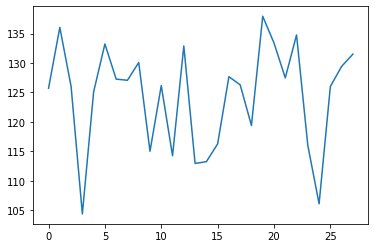

In [208]:
plt.plot(pigmented)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


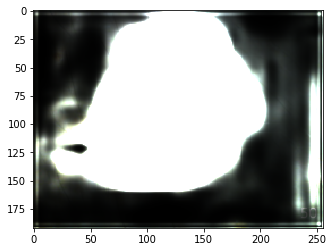

In [209]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


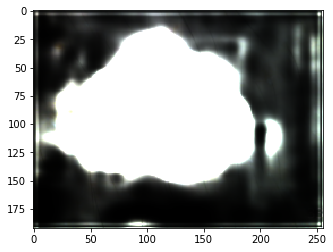

In [210]:
plt.imshow(imagesp[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


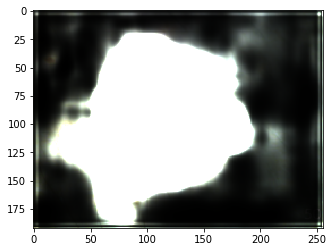

In [211]:
plt.imshow(imagesp[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


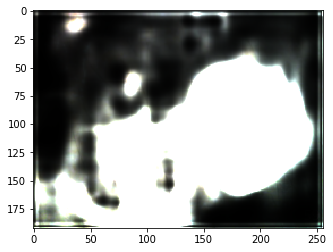

In [212]:
plt.imshow(imagesp[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


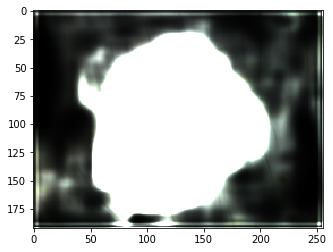

In [213]:
plt.imshow(imagesp[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


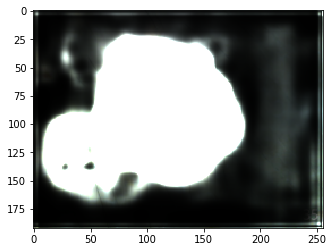

In [214]:
plt.imshow(imagesp[5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


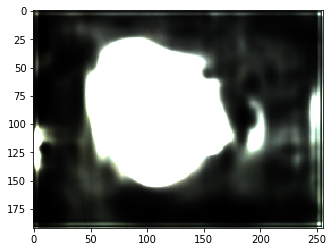

In [215]:
plt.imshow(imagesp[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


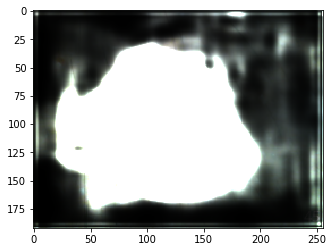

In [216]:
plt.imshow(imagesp[7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


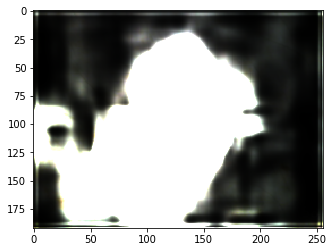

In [217]:
plt.imshow(imagesp[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


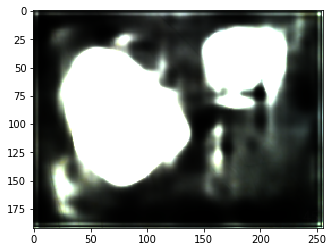

In [218]:
plt.imshow(imagesp[9])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


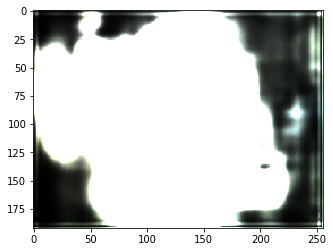

In [219]:
plt.imshow(imagesp[10])

In [220]:
pigmented[0]

125.70967107819338

In [221]:
pigmented[10]

126.15943921391283

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


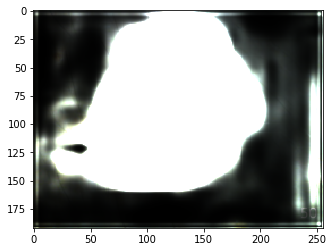

In [222]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


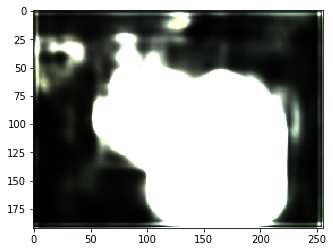

In [223]:
plt.imshow(imagesp[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


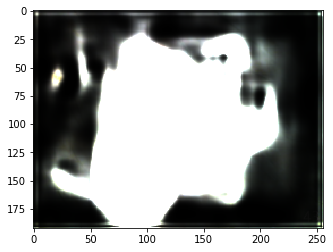

In [224]:
plt.imshow(imagesp[12])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


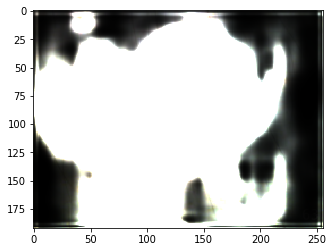

In [225]:
plt.imshow(imagesp[13])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


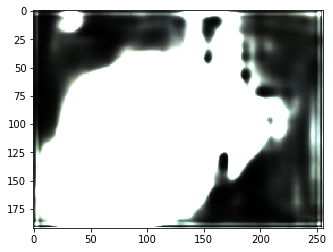

In [226]:
plt.imshow(imagesp[14])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


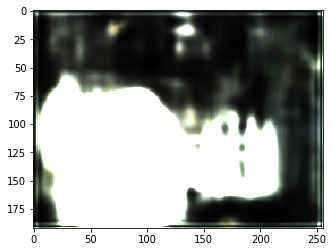

In [227]:
plt.imshow(imagesp[15])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


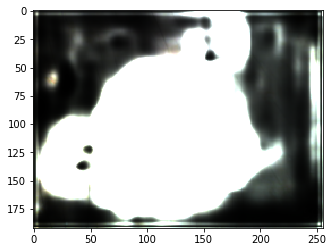

In [228]:
plt.imshow(imagesp[16])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


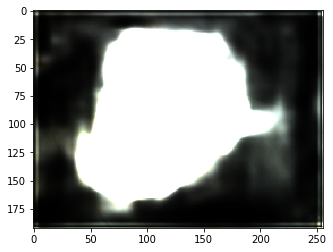

In [229]:
plt.imshow(imagesp[17])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


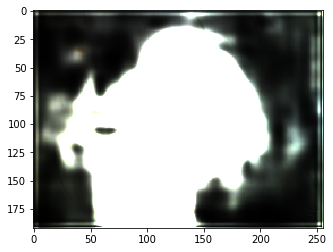

In [230]:
plt.imshow(imagesp[18])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


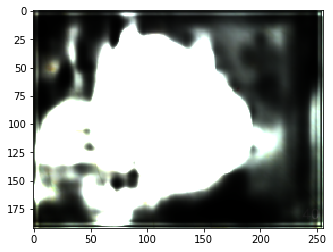

In [231]:
plt.imshow(imagesp[19])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


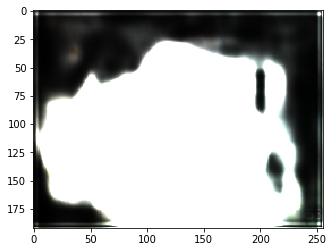

In [232]:
plt.imshow(imagesp[20])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


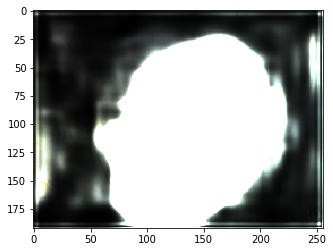

In [233]:
plt.imshow(imagesp[21])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


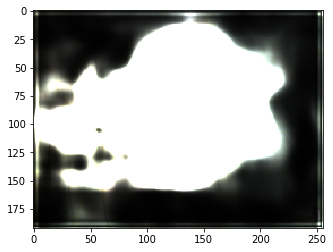

In [234]:
plt.imshow(imagesp[22])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


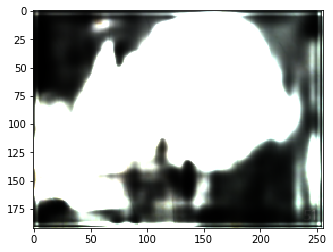

In [235]:
plt.imshow(imagesp[23])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


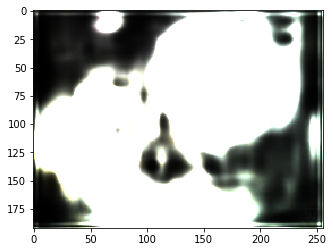

In [236]:
plt.imshow(imagesp[24])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


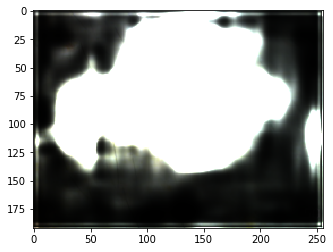

In [237]:
plt.imshow(imagesp[25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


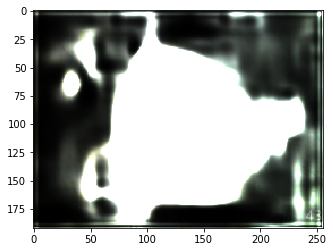

In [238]:
plt.imshow(imagesp[26])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


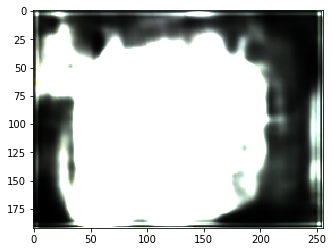

In [239]:
plt.imshow(imagesp[27])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


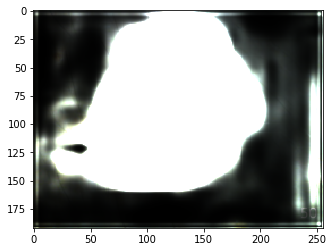

In [240]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

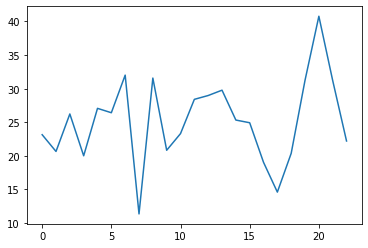

In [243]:
plt.plot(test)

In [244]:
filenames

['ISIC_0000000r_segmentation.png',
 'ISIC_0000000f_segmentation.png',
 'ISIC_0000000_segmentation.png',
 'ISIC_0000001f_segmentation.png',
 'ISIC_0000008r_segmentation.png',
 'ISIC_0000008_segmentation.png',
 'ISIC_0000007_segmentation.png',
 'ISIC_0000001_segmentation.png',
 'ISIC_0000007r_segmentation.png',
 'ISIC_0000008f_segmentation.png',
 'ISIC_0000001r_segmentation.png',
 'ISIC_0000007f_segmentation.png',
 'ISIC_0000016r_segmentation.png',
 'ISIC_0000016f_segmentation.png',
 'ISIC_0000016_segmentation.png',
 'ISIC_0000024f_segmentation.png',
 'ISIC_0000024_segmentation.png',
 'ISIC_0000025f_segmentation.png',
 'ISIC_0000024r_segmentation.png',
 'ISIC_0000029r_segmentation.png',
 'ISIC_0000029_segmentation.png',
 'ISIC_0000028r_segmentation.png',
 'ISIC_0000025r_segmentation.png',
 'ISIC_0000025_segmentation.png',
 'ISIC_0000029f_segmentation.png',
 'ISIC_0000028f_segmentation.png',
 'ISIC_0000028_segmentation.png',
 'ISIC_0000031r_segmentation.png',
 'ISIC_0000031f_segmentation.

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

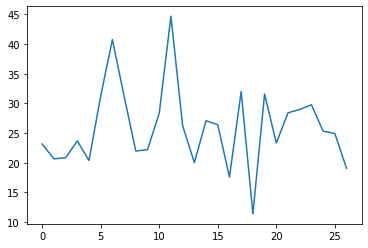

In [247]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [249]:
normal.shape

(27,)

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

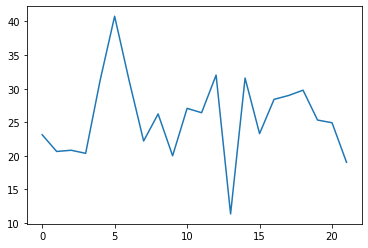

In [253]:
plt.plot(normal-pigmented)

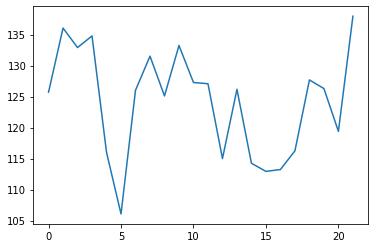

In [254]:
plt.plot(pigmented)

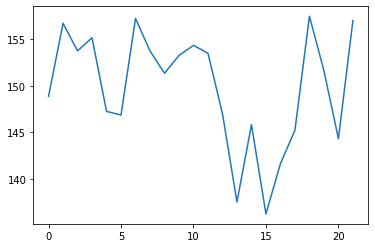

In [255]:
plt.plot(normal)

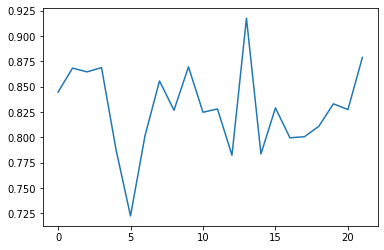

In [256]:
plt.plot(pigmented/normal)

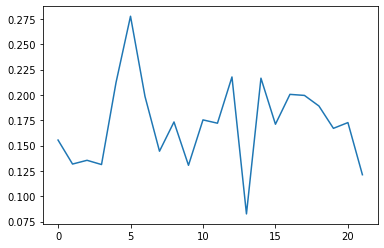

In [257]:
plt.plot((normal - pigmented)/normal)

In [258]:
new_files_names

array(['ISIC_0000000r_segmentation.png', 'ISIC_0000000f_segmentation.png',
       'ISIC_0000000_segmentation.png', 'ISIC_0000008r_segmentation.png',
       'ISIC_0000008_segmentation.png', 'ISIC_0000007_segmentation.png',
       'ISIC_0000001_segmentation.png', 'ISIC_0000008f_segmentation.png',
       'ISIC_0000016r_segmentation.png', 'ISIC_0000016f_segmentation.png',
       'ISIC_0000016_segmentation.png', 'ISIC_0000024f_segmentation.png',
       'ISIC_0000025f_segmentation.png', 'ISIC_0000024r_segmentation.png',
       'ISIC_0000029r_segmentation.png', 'ISIC_0000029_segmentation.png',
       'ISIC_0000028r_segmentation.png', 'ISIC_0000025r_segmentation.png',
       'ISIC_0000025_segmentation.png', 'ISIC_0000029f_segmentation.png',
       'ISIC_0000028f_segmentation.png', 'ISIC_0000028_segmentation.png'],
      dtype='<U30')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


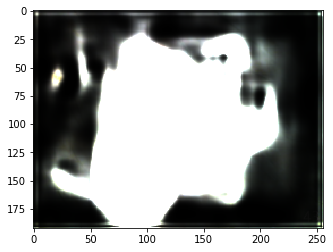

In [259]:
plt.imshow(imagesp[12])